In [96]:
import gurobipy as gp
from gurobipy import GRB
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [97]:
data = pd.read_csv('Closing_Price.csv')
stocks = data.columns
current_price = data.iloc[1,:60]
stocks
data.shape

(120, 30)

In [98]:
stocks

Index(['INDUSINDBK.csv', 'Reliance.csv', 'Bajaj_Finserv.csv', 'Axis.csv',
       'Kotakbank.csv', 'TITAN.csv', 'TECHM.csv', 'LT.csv', 'MarutiSuzuki.csv',
       'TATASTEEL.csv', 'Bharti_Airtel.csv', 'HDFC_BANK.csv',
       'Nestle_India.csv', 'TCS.csv', 'ITC.csv', 'HEROMOTOCO.csv', 'icici.csv',
       'ONGC.csv', 'HCL.csv', 'POWERGRID.csv', 'BAJAJ-AUTO.csv', 'HU.csv',
       'Infosys.csv', 'ULTRACEMCO.csv', 'SBI.csv', 'Sun_Pharma.csv',
       'NTPC.csv', 'MnM.csv', 'AsianPaints.csv', 'HDFC.csv'],
      dtype='object')

In [99]:
closes = np.transpose(np.array(data))       # matrix of daily closing prices
absdiff = np.diff(closes)                   # change in closing price each day
reldiff = np.divide(absdiff, closes[:,:-1]) # relative change in daily closing price
delta = np.mean(reldiff, axis=1)            # mean price change
sigma = np.cov(reldiff)                     # covariance (standard deviations)
std = np.std(reldiff, axis=1)               # standard deviation

In [100]:
sigma

array([[ 3.53228677e-04,  9.22261636e-05,  1.45909840e-04,
         1.00695720e-04,  5.21394221e-05,  6.14644774e-05,
        -6.29065176e-06,  7.67871755e-05,  6.24993722e-05,
         8.44240165e-05,  6.60324922e-05,  8.19412359e-05,
         2.39618469e-05,  7.99899551e-05,  4.49873862e-05,
         5.55899316e-05,  8.26257321e-05,  5.37405085e-05,
         5.96271317e-05,  1.63952355e-05,  4.55205993e-05,
         1.45371628e-05,  8.26620221e-05,  5.71883277e-05,
         1.78804399e-04,  1.53904683e-06,  4.46494529e-05,
         7.81990658e-05,  4.06788114e-05,  8.52150891e-05],
       [ 9.22261636e-05,  1.56123476e-04,  1.07712625e-04,
         5.90524248e-05,  3.88641268e-05,  4.11617486e-05,
         4.42881123e-05,  4.65178578e-05,  4.64545580e-05,
         7.31552336e-05,  4.23019867e-05,  5.52931016e-05,
         4.49421326e-05,  5.32239679e-05,  4.72284781e-05,
         4.90099785e-05,  5.74982974e-05,  5.51374628e-05,
         5.65313535e-05,  9.94767393e-06,  4.15335101e-

In [101]:
Investing_amount = 1000000.00

In [102]:
# Correlation to Covariance
def cor_to_cov(cor, data):
    n = data.shape[0]
    cov_mat = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            x, y = data[i], data[j]
            cov_mat[i][j] = cor[i][j]*(x.std() * y.std())
    return cov_mat

# Spearman's Cov

In [103]:
# Python3 Program to find correlation coefficient


# Utility Function to print
# a Vector
def printVector(X):
	print(*X)

# Function returns the rank vector
# of the set of observations


def rankify(X):

	N = len(X)

	# Rank Vector
	Rank_X = [None for _ in range(N)]

	for i in range(N):

		r = 1
		s = 1

		# Count no of smaller elements
		# in 0 to i-1
		for j in range(i):
			if (X[j] < X[i]):
				r += 1
			if (X[j] == X[i]):
				s += 1

		# Count no of smaller elements
		# in i+1 to N-1
		for j in range(i+1, N):
			if (X[j] < X[i]):
				r += 1
			if (X[j] == X[i]):
				s += 1

		# Use Fractional Rank formula
		# fractional_rank = r + (n-1)/2
		Rank_X[i] = r + (s-1) * 0.5

	# Return Rank Vector
	return Rank_X


# function that returns
# Pearson correlation coefficient.
def correlationCoefficient(X, Y):
	n = len(X)
	sum_X = 0
	sum_Y = 0
	sum_XY = 0
	squareSum_X = 0
	squareSum_Y = 0

	for i in range(n):

		# sum of elements of array X.
		sum_X = sum_X + X[i]

		# sum of elements of array Y.
		sum_Y = sum_Y + Y[i]

		# sum of X[i] * Y[i].
		sum_XY = sum_XY + X[i] * Y[i]

		# sum of square of array elements.
		squareSum_X = squareSum_X + X[i] * X[i]
		squareSum_Y = squareSum_Y + Y[i] * Y[i]

	# use formula for calculating
	# correlation coefficient.
	corr = (n * sum_XY - sum_X * sum_Y) / ((n * squareSum_X -
											sum_X * sum_X) * (n * squareSum_Y - sum_Y * sum_Y)) ** 0.5

	return corr


# Driver function
X = [15, 18, 21, 15, 21]
Y = [25, 25, 27, 27, 27]

# Get ranks of vector X
rank_x = rankify(X)

# Get ranks of vector y
rank_y = rankify(Y)

print("Vector X")
printVector(X)

# Print rank vector of X
print("Rankings of X")
printVector(rank_x)

# Print Vector Y
print("Vector Y")
printVector(Y)

# Print rank vector of Y
print("Rankings of Y")
printVector(rank_y)

# Print Spearmans coefficient
print("Spearman's Rank correlation: ")
print(correlationCoefficient(rank_x, rank_y))


# This code is contributed by phasing17

Vector X
15 18 21 15 21
Rankings of X
1.5 3.0 4.5 1.5 4.5
Vector Y
25 25 27 27 27
Rankings of Y
1.5 1.5 4.0 4.0 4.0
Spearman's Rank correlation: 
0.45643546458763845


In [104]:
spearman_cor = np.zeros((30,30)).tolist()
for i in range(len(stocks)):
    for j in range(len(stocks)):
        rank_i = rankify(reldiff[i])
        rank_j = rankify(reldiff[j])
        spearman_cor[i][j] =  correlationCoefficient(rank_i, rank_j)
        
spearman_cor = np.array(spearman_cor)
spearman_cor.shape

(30, 30)

In [105]:
spearman_cor

array([[ 1.        ,  0.37290984,  0.49379718,  0.38891896,  0.21806011,
         0.23715995,  0.08804301,  0.32159237,  0.31011964,  0.26232129,
         0.29508617,  0.31416465,  0.04297109,  0.3388335 ,  0.14733656,
         0.17491098,  0.32532403,  0.28085231,  0.28030195,  0.09594787,
         0.25352514,  0.04221621,  0.31238428,  0.20350377,  0.5099069 ,
         0.03570716,  0.22136605,  0.24625409,  0.20588947,  0.35024925],
       [ 0.37290984,  1.        ,  0.56207093,  0.44363339,  0.28087879,
         0.30286284,  0.26165076,  0.32084461,  0.33120638,  0.35980202,
         0.26097422,  0.32191995,  0.3313773 ,  0.36355932,  0.33745905,
         0.27697621,  0.40497792,  0.36652447,  0.31984048,  0.07189147,
         0.32134311,  0.08758012,  0.34176755,  0.370809  ,  0.34577045,
         0.02290984,  0.33672081,  0.39999288,  0.27459051,  0.41149409],
       [ 0.49379718,  0.56207093,  1.        ,  0.31952001,  0.26103831,
         0.43300812,  0.33971656,  0.26502635,  0

In [106]:
spearman_cov = cor_to_cov(spearman_cor, reldiff)
spearman_cov

array([[ 3.50260368e-04,  8.68362329e-05,  1.53915533e-04,
         1.06121663e-04,  4.07819513e-05,  5.83753131e-05,
         2.68112859e-05,  7.07165019e-05,  6.28852270e-05,
         8.64168895e-05,  6.45133926e-05,  6.92272153e-05,
         8.73313709e-06,  7.46134285e-05,  3.18958300e-05,
         3.86544249e-05,  6.89204164e-05,  6.71567576e-05,
         7.15053579e-05,  2.27495986e-05,  6.11618454e-05,
         9.57453441e-06,  7.83915203e-05,  4.72048850e-05,
         1.54964545e-04,  6.44613116e-06,  4.79780333e-05,
         6.29744418e-05,  4.41245129e-05,  8.02707204e-05],
       [ 8.68362329e-05,  1.54811514e-04,  1.16474566e-04,
         8.04776499e-05,  3.49234277e-05,  4.95609925e-05,
         5.29725497e-05,  4.69046517e-05,  4.46502798e-05,
         7.88015597e-05,  3.79319145e-05,  4.71599759e-05,
         4.47736830e-05,  5.32245587e-05,  4.85680412e-05,
         4.06940341e-05,  5.70386491e-05,  5.82667551e-05,
         5.42440390e-05,  1.13323997e-05,  5.15388446e-

# Kendalltau

In [107]:
# Import required libraries
from scipy.stats import kendalltau
  
# Taking values from the above example in Lists
X = [1, 2, 3, 4, 5, 6, 7]
Y = [1, 3, 6, 2, 7, 4, 5]
  
# Calculating Kendall Rank correlation
corr, _ = kendalltau(X, Y)
print('Kendall Rank correlation: %.5f' % corr)
print(kendalltau(X, X))

Kendall Rank correlation: 0.42857
KendalltauResult(correlation=1.0, pvalue=0.0003968253968253968)


In [108]:
Kendall_cor = np.zeros((30,30)).tolist()
for i in range(len(stocks)):
    for j in range(len(stocks)):
        Kendall_cor[i][j] =  kendalltau(reldiff[i], reldiff[j])[0]
        
Kendall_cor = np.array(Kendall_cor)
Kendall_cor.shape

(30, 30)

In [109]:
Kendall_cor

array([[ 1.        ,  0.26021934,  0.35279875,  0.27389261,  0.14855434,
         0.16479134,  0.05739923,  0.22347244,  0.20979917,  0.17170136,
         0.19982908,  0.21093861,  0.0257798 ,  0.23828514,  0.10041305,
         0.11721977,  0.22603618,  0.18576822,  0.19384703,  0.06138727,
         0.17020367,  0.03404073,  0.21806011,  0.13659023,  0.36037319,
         0.02492522,  0.14758886,  0.17276741,  0.14342686,  0.23572141],
       [ 0.26021934,  1.        ,  0.39125481,  0.3163367 ,  0.17732517,
         0.20780516,  0.18587096,  0.22831505,  0.23173337,  0.2418068 ,
         0.17789489,  0.21806011,  0.22204814,  0.23800028,  0.23572141,
         0.18814984,  0.2781655 ,  0.24873567,  0.21350235,  0.0519869 ,
         0.21777525,  0.06110241,  0.23372739,  0.25309785,  0.23018304,
         0.01951289,  0.22679679,  0.26591654,  0.18473152,  0.27873522],
       [ 0.35279875,  0.39125481,  1.        ,  0.21635095,  0.1827375 ,
         0.29525709,  0.23059393,  0.18985899,  0

In [110]:
Kendall_cov = cor_to_cov(Kendall_cor, reldiff)

# DistCor

In [111]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

# from numbapro import jit, float32

def distcorr(X, Y):
    """ Compute the distance correlation function
    
    >>> a = [1,2,3,4,5]
    >>> b = np.array([1,2,9,4,4])
    >>> distcorr(a, b)
    0.762676242417
    """
    X = np.atleast_1d(X)
    Y = np.atleast_1d(Y)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()
    
    dcov2_xy = (A * B).sum()/((n * n)*1.0)
    dcov2_xx = (A * A).sum()/((n * n)*1.0)
    dcov2_yy = (B * B).sum()/((n * n)*1.0)
    dcor = np.sqrt(dcov2_xy)/np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))
    return dcor


In [112]:
dist_cor = np.zeros((30,30)).tolist()
dist_cor
for i in range(0,30):
    for j in range(0,30):
        dist_cor[i][j] = distcorr(reldiff[i], reldiff[j])

dist_cor = np.array(dist_cor)
dist_cor.shape

(30, 30)

In [113]:
dist_cor

array([[1.        , 0.37166104, 0.48438432, 0.41910386, 0.26085394,
        0.26076518, 0.19637295, 0.33574318, 0.31048924, 0.27170984,
        0.30656209, 0.34483298, 0.15194623, 0.34921386, 0.2517858 ,
        0.23225966, 0.34757419, 0.29675312, 0.29151689, 0.20204495,
        0.2820658 , 0.19167224, 0.3164548 , 0.25546   , 0.52258563,
        0.1169819 , 0.24621824, 0.2825983 , 0.26789546, 0.36925249],
       [0.37166104, 1.        , 0.54076748, 0.43634416, 0.32655954,
        0.29898075, 0.28921967, 0.3292714 , 0.3318237 , 0.36171231,
        0.27480119, 0.36805296, 0.3302324 , 0.37331957, 0.34202591,
        0.28376864, 0.39862676, 0.40779915, 0.33104828, 0.14281063,
        0.31887798, 0.14473692, 0.34143502, 0.36252511, 0.38540367,
        0.14699222, 0.32443311, 0.37238188, 0.29577033, 0.43064696],
       [0.48438432, 0.54076748, 1.        , 0.35638816, 0.30678731,
        0.41665926, 0.32816417, 0.27611713, 0.32418424, 0.28402185,
        0.17855446, 0.2924759 , 0.22130848, 0.

In [114]:
dist_cov = cor_to_cov(dist_cor, reldiff)

# Optimization

In [115]:
def port_opt_ret(cov, stocks, delta, method, gamma):
    m = gp.Model('portfolio')
    x = m.addMVar(len(stocks))
    m.params.NonConvex = 2 
    portfolio_risk = x @ cov @ x
    portfolio_return = x @ delta
    m.setObjective(portfolio_return, GRB.MAXIMIZE)

    # Fix budget with a constraint
    m.addConstr(x.sum() == 1, 'budget')
    m.addConstr(portfolio_risk <= gamma**2, 'Risk')
    #m.addConstr(x@delta >= 0.001, 'return')

    # Verify model formulation
    m.write(str(method)+'.lp')

    # Optimize model to find the minimum risk portfolio
    m.optimize()
    
    w = x.X
    for i in range(len(stocks)):
        if(w[i] <= 1e-3):
            m.addConstr(x[i] == 0)

    m.optimize()
    
    minrisk_volatility = sqrt( x.X @ cov @ x.X)
    minrisk_return = (m.ObjVal)
    
    return x.X, minrisk_return, minrisk_volatility

In [116]:
def port_opt_var(cov, stocks, delta, method, r):
    m = gp.Model('portfolio')
    x = m.addMVar(len(stocks))

    portfolio_risk = x @ cov @ x
    portfolio_return = x @ delta
    m.setObjective(portfolio_risk, GRB.MINIMIZE)

    # Fix budget with a constraint
    m.addConstr(x.sum() == 1, 'budget')
    #m.addConstr(portfolio_return >= r, 'budget')
    
    m.write(str(method)+'.lp')
    m.optimize()
    minrisk_volatility = sqrt( x.X @ cov @ x.X)
    minrisk_return = (m.ObjVal)
    
    return x.X, minrisk_return, minrisk_volatility

In [117]:
# def port_opt_sharpe(cov, stocks, delta, method, r):
#     m = gp.Model('portfolio')
#     x = m.addMVar(len(stocks))
    
#     portfolio_risk = x @ cov @ x
#     portfolio_return = x @ delta
#     sharpe_ratio = portfolio_return/portfolio_risk
#     m.setObjective(sharpe_ratio, GRB.MAXIMIZE)

#     # Fix budget with a constraint
#     m.addConstr(x.sum() == 1, 'budget')
#     m.addConstr(portfolio_return >= r, 'budget')
    
#     # Verify model formulation
#     m.write(str(method)+'.lp')

#     # Optimize model to find the minimum risk portfolio
#     m.optimize()
#     minrisk_volatility = sqrt(m.ObjVal)
#     minrisk_return = delta @ x.X
#     return x.X, minrisk_return, minrisk_volatility

# Min-Variance

In [118]:
port_opt_var(sigma, stocks, delta, 'Pearson', 0.00251)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0xc9e73cef
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 1 rows, 30 columns, 30 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.350e+02
 Factor NZ  : 4.650e+02
 Factor Ops : 9.455e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.90269859e+05 -2.902

(array([4.44310281e-08, 1.76699336e-07, 3.76905453e-08, 4.69901467e-02,
        8.12963610e-02, 6.84834020e-08, 2.04988198e-02, 8.46934451e-03,
        1.10953792e-01, 4.48558855e-07, 3.02912206e-02, 1.91807573e-07,
        1.29879376e-02, 7.71630538e-08, 7.81598175e-02, 2.73971384e-03,
        3.27301208e-02, 6.80295098e-02, 2.77988489e-05, 4.60190693e-02,
        3.60912641e-02, 3.72327516e-02, 6.09250975e-08, 4.06696666e-02,
        3.73128897e-08, 2.28131531e-01, 1.51092381e-04, 3.50959533e-08,
        1.18528816e-01, 4.75378454e-08]),
 2.6214389992862362e-05,
 0.005119999022740354)

In [119]:
port_opt_var(dist_cov, stocks, delta, 'Distance', 0.00251)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x7884e87d
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [6e-05, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 1 rows, 30 columns, 30 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.350e+02
 Factor NZ  : 4.650e+02
 Factor Ops : 9.455e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.03549865e+05 -3.035

(array([1.51299307e-06, 6.07529637e-06, 7.86459255e-07, 1.24795186e-04,
        1.43424796e-01, 8.07494697e-07, 2.20119295e-05, 5.72023784e-02,
        9.01446803e-02, 2.82328812e-07, 3.82751497e-02, 2.88656048e-05,
        8.45199436e-02, 3.77858230e-04, 4.59711784e-02, 3.01558719e-02,
        3.11544370e-02, 5.05488711e-02, 6.83641282e-06, 4.36001955e-02,
        1.37159871e-03, 2.58490040e-02, 1.82004638e-06, 3.84724814e-02,
        3.07368000e-07, 2.07455601e-01, 1.97214644e-02, 2.87753458e-07,
        9.15595506e-02, 5.50750325e-07]),
 3.5699524114785675e-05,
 0.005974907875004087)

In [120]:
port_opt_var(Kendall_cov, stocks, delta, 'Kendall', 0.00251)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x01122a6f
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 1 rows, 30 columns, 30 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.350e+02
 Factor NZ  : 4.650e+02
 Factor Ops : 9.455e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.24987261e+05 -4.249

(array([6.47888354e-06, 7.78968247e-05, 5.21626707e-07, 2.14398674e-02,
        1.00350978e-01, 4.67558810e-07, 9.31781378e-03, 3.85608466e-02,
        7.31495221e-02, 3.75488683e-03, 4.26634436e-02, 3.93728839e-03,
        5.80274309e-02, 2.63314391e-04, 5.44885378e-02, 3.35725730e-02,
        4.07916969e-02, 5.59480578e-02, 2.06202510e-04, 5.78045650e-02,
        1.11311635e-02, 5.04350122e-02, 7.84456719e-07, 3.93644863e-02,
        2.42293416e-07, 1.87490901e-01, 2.14022432e-02, 3.03255482e-07,
        9.58121078e-02, 3.65652008e-07]),
 2.283788265654291e-05,
 0.004778899732840476)

In [121]:
port_opt_var(spearman_cov, stocks, delta, 'Spearman', 0.00251)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0xd9f008aa
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 1 rows, 30 columns, 30 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.350e+02
 Factor NZ  : 4.650e+02
 Factor Ops : 9.455e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.59343104e+05 -2.593

(array([9.38726871e-08, 6.14495166e-07, 8.11105771e-08, 1.91251999e-02,
        1.07349651e-01, 8.05730434e-08, 3.13635106e-06, 2.98776220e-02,
        9.41278501e-02, 9.65237531e-04, 3.81329102e-02, 2.68840096e-07,
        4.97241478e-02, 2.53317971e-07, 5.63559542e-02, 1.72668375e-02,
        2.95597085e-02, 6.57851364e-02, 8.57027288e-07, 6.14653263e-02,
        6.54524249e-06, 4.42663233e-02, 8.40000631e-08, 3.56340324e-02,
        4.66462288e-08, 2.35743224e-01, 8.10632221e-05, 5.78491267e-08,
        1.14527598e-01, 5.85806969e-08]),
 2.8646282100337823e-05,
 0.005352222164702982)

# Sharpe Ratio

In [122]:
#port_opt_sharpe(sigma, stocks, delta, 'Spearman', 0.00251)

In [123]:
#port_opt_sharpe(spearman_cov, stocks, delta, 'Spearman', 0.00251)

# Max-Return

In [124]:
port_opt_ret(sigma, stocks, delta, 'Pearson', 0.01 )

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x52dc0363
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [8e-07, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual

(array([0.        , 0.        , 0.44028497, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.09453804, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08852404, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.37665296, 0.        ]),
 0.0017830714719637211,
 0.009999998572842946)

In [125]:
a = port_opt_ret(Kendall_cov, stocks, delta, 'Kendall', 0.01 )[0]
DF = pd.DataFrame(a)
 
# save the dataframe as a csv file
DF.to_csv("data1.csv")

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x5eda3d5d
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [8e-07, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual

In [126]:
port_opt_ret(dist_cov, stocks, delta, 'Distance', 0.01 )

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x2d261c0b
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [3e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual

(array([0.        , 0.        , 0.38849174, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14097655, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.05771428, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.41281742, 0.        ]),
 0.0017261858739918232,
 0.00999999767745302)

In [127]:
port_opt_ret(spearman_cov, stocks, delta, 'Spearman', 0.01 )

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x0eb2f7c5
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [9e-07, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual

(array([0.        , 0.        , 0.42789459, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.11731423, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08343977, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.37135141, 0.        ]),
 0.00175976145085833,
 0.009999951382567264)

In [128]:
port_opt_ret(0.6*sigma + 0.4*Kendall_cov, stocks, delta, 'mixed', 0.01 )

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x967e11c5
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-06, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.02s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual

(array([0.        , 0.        , 0.44441866, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.09947876, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.07207571, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.38402688, 0.        ]),
 0.0017993465863026387,
 0.009999371867478287)

In [129]:
stocks

Index(['INDUSINDBK.csv', 'Reliance.csv', 'Bajaj_Finserv.csv', 'Axis.csv',
       'Kotakbank.csv', 'TITAN.csv', 'TECHM.csv', 'LT.csv', 'MarutiSuzuki.csv',
       'TATASTEEL.csv', 'Bharti_Airtel.csv', 'HDFC_BANK.csv',
       'Nestle_India.csv', 'TCS.csv', 'ITC.csv', 'HEROMOTOCO.csv', 'icici.csv',
       'ONGC.csv', 'HCL.csv', 'POWERGRID.csv', 'BAJAJ-AUTO.csv', 'HU.csv',
       'Infosys.csv', 'ULTRACEMCO.csv', 'SBI.csv', 'Sun_Pharma.csv',
       'NTPC.csv', 'MnM.csv', 'AsianPaints.csv', 'HDFC.csv'],
      dtype='object')

## Efficient Frontier

In [148]:
# Create an empty model
m = gp.Model('portfolio')

# Add matrix variable for the stocks
x = m.addMVar(len(stocks))

# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks
portfolio_risk_p = x @ sigma @ x
m.setObjective(portfolio_risk_p, GRB.MINIMIZE)

# Fix budget with a constraint
m.addConstr(x.sum() == 1, 'budget')

#m.addConstr(x@delta >= 0.001, 'return')

# Verify model formulation
m.write('portfolio_selection_optimization.lp')

# Optimize model to find the minimum risk portfolio
m.optimize()
 
w = x.X
for i in range(len(stocks)):
    if(w[i] <= 1e-3):
        m.addConstr(x[i] == 0)

m.optimize()

minrisk_volatility_p = sqrt(m.ObjVal)
minrisk_return_p = delta @ x.X
#print(minrisk_return,minrisk_volatility)

# Create an expression representing the expected return for the portfolio
portfolio_return_p = delta @ x
target = m.addConstr(portfolio_return_p == minrisk_return_p, 'target')

# Solve for efficient frontier by varying target return
frontier_pearson = np.empty((2,0))
for r in np.linspace(delta.min(), delta.max(), 25):
    target.rhs = r
    m.optimize()
    frontier_pearson = np.append(frontier_pearson, [[sqrt(m.ObjVal)],[r]], axis=1)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0xc9e73cef
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 1 rows, 30 columns, 30 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.350e+02
 Factor NZ  : 4.650e+02
 Factor Ops : 9.455e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.90269859e+05 -2.902

Presolve time: 0.01s
Presolved: 2 rows, 17 columns, 34 nonzeros
Presolved model has 153 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 16
 AA' NZ     : 1.530e+02
 Factor NZ  : 1.710e+02
 Factor Ops : 2.109e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.82138565e+05 -2.82138565e+05  1.20e+04 4.43e-03  1.00e+06     0s
   1   1.78736995e+04 -1.78992243e+04  7.90e+02 2.92e-04  6.79e+04     0s
   2   3.42628708e-02 -2.76435928e+01  2.72e+00 1.00e-06  2.36e+02     0s
   3   4.60541498e-05 -2.68401372e+01  9.63e-03 3.56e-09  2.40e+00     0s
   4   4.84022557e-05 -4.98746829e+00  1.58e-04 5.82e-11  3.05e-01     0s
   5   4.90417120e-05 -1.26938574e-02  1.58e-10 5.81e-17  7.50e-04     0s
   6   4.88998646e-05 -2.12718095e-05  6.75e-13 2.17e-19  4.13e-06     0s
   7   4.56836681e-05  3.59132709e-05  3.61e-14 2.17e-19  5

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.82146155e+05 -2.82146155e+05  1.20e+04 3.03e-03  1.00e+06     0s
   1   1.78737042e+04 -1.78958799e+04  7.90e+02 1.99e-04  6.79e+04     0s
   2   3.37982226e-02 -2.45987974e+01  2.70e+00 6.81e-07  2.35e+02     0s
   3   3.40294896e-05 -2.42244021e+01  9.44e-04 2.38e-10  1.51e+00     0s
   4   3.38238609e-05 -8.24273590e-02  4.60e-07 1.16e-13  4.85e-03     0s
   5   3.38182862e-05 -8.37870798e-05  1.96e-10 4.97e-17  6.92e-06     0s
   6   2.99648891e-05  1.56550196e-05  5.90e-12 1.52e-18  8.42e-07     0s
   7   2.80052516e-05  2.60923069e-05  1.02e-16 4.34e-19  1.13e-07     0s
   8   2.76020976e-05  2.74048907e-05  1.13e-17 1.84e-18  1.16e-08     0s
   9   2.75569933e-05  2.75491031e-05  1.13e-17 4.34e-19  4.64e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.75569933e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) C


Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.74461405e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 15 rows, 30 columns and 73 nonzeros
Model fingerprint: 0x03adaa32
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-04, 1e+00]
Presolve removed 13 rows and 13 columns
Presolve time: 0.01s
Presolved: 2 rows, 17 columns, 34 nonzeros
Presolved model has 153 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 16
 AA' NZ     : 1.530e+02
 Factor NZ  : 1.710e+02
 Factor Ops : 2.109e+03 (less than 1 second per iteration)
 Threads    : 1

      

  RHS range        [1e-03, 1e+00]
Presolve removed 13 rows and 13 columns
Presolve time: 0.01s
Presolved: 2 rows, 17 columns, 34 nonzeros
Presolved model has 153 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 16
 AA' NZ     : 1.530e+02
 Factor NZ  : 1.710e+02
 Factor Ops : 2.109e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.82163233e+05 -2.82163233e+05  1.20e+04 1.42e-04  1.00e+06     0s
   1   1.78737363e+04 -1.78883760e+04  7.90e+02 9.32e-06  6.79e+04     0s
   2   3.28160903e-02 -1.77439586e+01  2.67e+00 3.15e-08  2.31e+02     0s
   3   5.43486869e-05 -1.70711352e+01  1.02e-02 1.20e-10  1.88e+00     0s
   4   6.87037130e-05 -5.51630184e+00  1.02e-08 1.20e-16  3.24e-01     0s
   5   6.87034766e-05 -5.48182151e-03  6.31e-14 5.65e-13  3.27e-04     0s
   6   6.84788818e-05  2.99841354e-05  1.98e-16 2.75e-15  2

AttributeError: Unable to retrieve attribute 'ObjVal'

In [149]:
# Create an empty model
m = gp.Model('portfolio')

# Add matrix variable for the stocks
x = m.addMVar(len(stocks))

# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks
portfolio_risk_sp = x @ spearman_cov @ x
m.setObjective(portfolio_risk_sp, GRB.MINIMIZE)

# Fix budget with a constraint
m.addConstr(x.sum() == 1, 'budget')

#m.addConstr(x@delta >= 0.001, 'return')

# Verify model formulation
m.write('portfolio_selection_optimization.lp')

# Optimize model to find the minimum risk portfolio
m.optimize()
 
w = x.X
for i in range(len(stocks)):
    if(w[i] <= 1e-3):
        m.addConstr(x[i] == 0)

m.optimize()

minrisk_volatility_sp = sqrt(m.ObjVal)
minrisk_return_sp = delta @ x.X
#print(minrisk_return,minrisk_volatility)

# Create an expression representing the expected return for the portfolio
portfolio_return_sp = delta @ x
target = m.addConstr(portfolio_return_sp == minrisk_return_sp, 'target')

# Solve for efficient frontier by varying target return
frontier_sp = np.empty((2,0))
for r in np.linspace(delta.min(), delta.max(), 25):
    target.rhs = r
    m.optimize()
    frontier_sp = np.append(frontier_sp, [[sqrt(m.ObjVal)],[r]], axis=1)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0xd9f008aa
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 1 rows, 30 columns, 30 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.350e+02
 Factor NZ  : 4.650e+02
 Factor Ops : 9.455e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.59343104e+05 -2.593

Presolved model has 120 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 14
 AA' NZ     : 1.200e+02
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.06548940e+05 -3.06548940e+05  1.10e+04 4.89e-03  1.00e+06     0s
   1   1.60921793e+04 -1.61163529e+04  7.39e+02 3.29e-04  6.91e+04     0s
   2   2.23828879e-02 -2.63643508e+01  2.00e+00 8.90e-07  1.90e+02     0s
   3   4.89608713e-05 -2.53250708e+01  7.54e-03 3.35e-09  2.38e+00     0s
   4   5.07797899e-05 -3.64834904e+00  6.08e-05 2.70e-11  2.47e-01     0s
   5   5.09682007e-05 -3.81734564e-03  6.08e-11 2.73e-17  2.58e-04     0s
   6   5.05837892e-05 -1.53405952e-05  9.02e-13 4.34e-19  4.39e-06     0s
   7   4.83707981e-05  4.02606463e-05  7.77e-14 4.34e-19  5.41e-07     0s
   8   4.58690940e-05  4.29328018e-05  3.47e-17 8

   0   3.06554750e+05 -3.06554750e+05  1.10e+04 3.37e-03  1.00e+06     0s
   1   1.60921857e+04 -1.61134159e+04  7.39e+02 2.27e-04  6.91e+04     0s
   2   2.23301273e-02 -2.36664471e+01  2.00e+00 6.13e-07  1.89e+02     0s
   3   3.66692436e-05 -2.31842897e+01  7.98e-04 2.45e-10  1.62e+00     0s
   4   3.65333969e-05 -6.48583032e-02  2.85e-07 8.75e-14  4.33e-03     0s
   5   3.65234414e-05 -6.53977144e-05  1.63e-10 5.01e-17  6.79e-06     0s
   6   3.22147167e-05  2.04575346e-05  2.21e-13 2.17e-19  7.84e-07     0s
   7   3.08934298e-05  2.97135905e-05  2.33e-15 2.17e-19  7.87e-08     0s
   8   3.06446690e-05  3.05395128e-05  3.12e-17 1.41e-18  7.01e-09     0s
   9   3.06109990e-05  3.06067383e-05  2.34e-17 1.02e-18  2.84e-10     0s

Barrier solved model in 9 iterations and 0.03 seconds (0.00 work units)
Optimal objective 3.06109990e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Th

Optimal objective 2.92371944e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 17 rows, 30 columns and 75 nonzeros
Model fingerprint: 0x6b5394eb
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-04, 1e+00]
Presolve removed 15 rows and 15 columns
Presolve time: 0.00s
Presolved: 2 rows, 15 columns, 30 nonzeros
Presolved model has 120 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 14
 AA' NZ     : 1.200e+02
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          

Presolved model has 120 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 14
 AA' NZ     : 1.200e+02
 Factor NZ  : 1.360e+02
 Factor Ops : 1.496e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.06567823e+05 -3.06567823e+05  1.10e+04 3.47e-05  1.00e+06     0s
   1   1.60922224e+04 -1.61068295e+04  7.39e+02 2.33e-06  6.91e+04     0s
   2   2.23083567e-02 -1.75921036e+01  1.99e+00 6.29e-09  1.88e+02     0s
   3   5.14331053e-05 -1.68323220e+01  8.74e-03 2.76e-11  1.93e+00     0s
   4   6.52648860e-05 -4.17530058e+00  8.74e-09 2.77e-17  2.78e-01     0s
   5   6.52646565e-05 -4.13788413e-03  5.83e-14 3.33e-13  2.80e-04     0s
   6   6.50509090e-05  3.38546415e-05  3.82e-16 1.54e-15  2.08e-06     0s
   7   5.77745831e-05  5.20435895e-05  4.58e-16 3.04e-18  3.82e-07     0s
   8   5.53310560e-05  5.48006892e-05  1.28e-16 2

AttributeError: Unable to retrieve attribute 'ObjVal'

In [150]:
# Create an empty model
m = gp.Model('portfolio')
m.params.NonConvex = 2
# Add matrix variable for the stocks
x = m.addMVar(len(stocks))

# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks
portfolio_risk_ds = x @ dist_cov @ x
m.setObjective(portfolio_risk_ds, GRB.MINIMIZE)

# Fix budget with a constraint
m.addConstr(x.sum() == 1, 'budget')

#m.addConstr(x@delta >= 0.001, 'return')

# Verify model formulation
m.write('portfolio_selection_optimization.lp')

# Optimize model to find the minimum risk portfolio
m.optimize()
w = x.X
for i in range(len(stocks)):
    if(w[i] <= 1e-3):
        m.addConstr(x[i] == 0)

m.optimize()

minrisk_volatility_ds = sqrt(m.ObjVal)
minrisk_return_ds= delta @ x.X
#print(minrisk_return,minrisk_volatility)

# Create an expression representing the expected return for the portfolio
portfolio_return_ds = delta @ x
target = m.addConstr(portfolio_return_ds == minrisk_return_ds, 'target')

# Solve for efficient frontier by varying target return
frontier_dist = np.empty((2,0))
for r in np.linspace(delta.min(), delta.max(), 25):
    target.rhs = r
    m.optimize()
    frontier_dist = np.append(frontier_dist, [[sqrt(m.ObjVal)],[r]], axis=1)

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x7884e87d
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [6e-05, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 1 rows, 30 columns, 30 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.350e+02
 Factor NZ  : 4.650e+02
 Factor Ops : 9.455e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl   

Presolved: 2 rows, 16 columns, 32 nonzeros
Presolved model has 136 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 15
 AA' NZ     : 1.360e+02
 Factor NZ  : 1.530e+02
 Factor Ops : 1.785e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.17185246e+05 -4.17185246e+05  1.30e+04 4.01e-03  1.00e+06     0s
   1   1.59900797e+04 -1.60094225e+04  9.68e+02 2.99e-04  7.62e+04     0s
   2   2.43761266e-01 -2.29996544e+01  2.66e+00 8.20e-07  2.11e+02     0s
   3   6.23837100e-05 -2.20227700e+01  1.09e-02 3.37e-09  2.23e+00     0s
   4   5.67981692e-05 -3.95421244e+00  9.31e-05 2.87e-11  2.53e-01     0s
   5   5.71383467e-05 -4.40542989e-03  9.31e-11 2.91e-17  2.79e-04     0s
   6   5.63284893e-05 -1.44044936e-04  4.00e-12 1.30e-18  1.25e-05     0s
   7   5.46130397e-05  4.40339879e-05  5.79e-14 4.34e-19  6.61e-07     0s
   8  

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.17177628e+05 -4.17177628e+05  1.30e+04 4.54e-03  1.00e+06     0s
   1   1.59900051e+04 -1.60079627e+04  9.68e+02 3.38e-04  7.62e+04     0s
   2   2.45578562e-01 -2.10710538e+01  2.67e+00 9.35e-07  2.13e+02     0s
   3   4.59650949e-05 -2.05281701e+01  1.34e-03 4.68e-10  1.39e+00     0s
   4   4.47160453e-05 -1.46560716e-01  1.25e-06 4.36e-13  9.16e-03     0s
   5   4.47101918e-05 -1.65635208e-04  5.42e-10 1.90e-16  1.31e-05     0s
   6   4.14364294e-05  2.48591551e-05  2.38e-11 8.67e-18  1.04e-06     0s
   7   3.80591618e-05  3.38073857e-05  5.20e-17 6.51e-19  2.66e-07     0s
   8   3.75645145e-05  3.72693411e-05  6.94e-18 1.25e-18  1.84e-08     0s
   9   3.74936247e-05  3.74711776e-05  4.86e-17 7.97e-19  1.40e-09     0s
  10   3.74853128e-05  3.74829935e-05  8.15e-17 1.52e-18  1.45e-10     0s

Barrier solved model in 10 iterations and 

   8   3.63091499e-05  3.62097538e-05  1.39e-17 1.03e-18  6.21e-09     0s
   9   3.62940151e-05  3.62921272e-05  1.04e-17 6.84e-19  1.18e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.62940151e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 16 rows, 30 columns and 74 nonzeros
Model fingerprint: 0x15501fd1
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [6e-05, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-04, 1e+00]
Presolve removed 14 rows and 14 columns
Presolve time: 0.00s
Presolved: 2 rows, 16 columns, 32 nonzeros
Presolved model has 136 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:


Optimize a model with 16 rows, 30 columns and 74 nonzeros
Model fingerprint: 0x8a40bef4
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [6e-05, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-03, 1e+00]
Presolve removed 14 rows and 14 columns
Presolve time: 0.01s
Presolved: 2 rows, 16 columns, 32 nonzeros
Presolved model has 136 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 15
 AA' NZ     : 1.360e+02
 Factor NZ  : 1.530e+02
 Factor Ops : 1.785e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.17160487e+05 -4.17160487e+05  1.30e+04 5.74e-03  1.00e+06     0s
   1   1.59898729e+04 -1.60047137e+04  9.68e+02 4.28e-04  7.62e+04     0s
   2   2.49725074e-01 -1.67268356e+01  2.71e+00 1.20e-06  2.16e+02

  19   7.36703327e-01 -7.36486728e-01  1.73e+01 5.47e-03  1.58e+00     0s
  20   6.18319264e-05  1.30991804e-04  4.99e-02 3.40e-03  1.33e-05     0s
  21   9.65081513e-05  1.37931406e-04  6.10e-03 3.41e-04  2.84e-06     0s
  22   1.40184086e-04  1.65838133e-04  1.20e-03 3.88e-05  8.61e-07     0s
  23   1.40486055e-04  2.44608857e-04  9.25e-04 5.62e-06  9.10e-07     0s
  24   1.01654789e-04  2.56245073e-02  4.84e-03 2.29e-11  7.20e-03     0s
  25   1.33045031e-04  9.91422860e-01  5.19e-02 2.45e-10  5.35e+00     0s
  26   1.21277391e-04  5.83439269e+01  5.32e-03 4.89e-11  3.63e+01     0s
  27   1.21277354e-04  5.83788118e+04  5.32e-03 3.26e-08  3.63e+04     0s
  28*  1.21277354e-04  5.84369842e+07  1.96e-07 1.10e-08  2.97e-02     0s
  29*  1.21277354e-04  5.84369840e+10  1.96e-10 2.28e-09  2.97e-05     0s
  30*  1.21277354e-04  5.84369840e+13  1.96e-13 1.28e-09  2.97e-08     0s
  31*  1.21277354e-04  5.84369840e+16  1.96e-16 2.08e-09  2.97e-11     0s

Barrier performed 31 iterations in 0.

AttributeError: Unable to retrieve attribute 'ObjVal'

In [151]:
# Create an empty model
m = gp.Model('portfolio')

# Add matrix variable for the stocks
x = m.addMVar(len(stocks))

# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks
portfolio_risk_kd = x @ Kendall_cov @ x
m.setObjective(portfolio_risk_kd, GRB.MINIMIZE)

# Fix budget with a constraint
m.addConstr(x.sum() == 1, 'budget')

#m.addConstr(x@delta >= 0.001, 'return')

# Verify model formulation
m.write('portfolio_selection_optimization.lp')

# Optimize model to find the minimum risk portfolio
m.optimize()

minrisk_volatility_kd = sqrt(m.ObjVal)
minrisk_return_kd = delta @ x.X
#print(minrisk_return,minrisk_volatility)

# Create an expression representing the expected return for the portfolio
portfolio_return_kd = delta @ x
target = m.addConstr(portfolio_return_kd == minrisk_return_kd, 'target')

# Solve for efficient frontier by varying target return
frontier_kd = np.empty((2,0))
for r in np.linspace(delta.min(), delta.max(), 25):
    target.rhs = r
    m.optimize()
    frontier_kd = np.append(frontier_kd, [[sqrt(m.ObjVal)],[r]], axis=1)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x01122a6f
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 1 rows, 30 columns, 30 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.350e+02
 Factor NZ  : 4.650e+02
 Factor Ops : 9.455e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.24987261e+05 -4.249

Presolve time: 0.00s
Presolved: 2 rows, 30 columns, 60 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.24394574e+05 -4.24394574e+05  1.97e+04 3.09e-03  1.00e+06     0s
   1   5.21112718e+04 -5.21328016e+04  1.78e+03 2.79e-04  9.31e+04     0s
   2   8.88607519e-01 -2.62603711e+01  1.45e+01 2.26e-06  7.68e+02     0s
   3   4.15253818e-05 -2.52842617e+01  2.73e-02 4.28e-09  2.29e+00     0s
   4   3.81835956e-05 -6.52366366e+00  2.73e-08 4.28e-15  2.17e-01     0s
   5   3.81834876e-05 -6.54020733e-03  2.30e-13 4.35e-13  2.19e-04     0s
   6   3.80748059e-05 -1.76981294e-05  1.61e-15 3.03e-15  1.86e-06     0s
   7   3.44412787e-05  2.62307330e-05  6.77e-17 4.42e-17  2

   3   3.43441755e-05 -2.49509014e+01  6.24e-03 9.58e-10  1.16e+00     0s
   4   3.28169228e-05 -2.22251392e+00  6.24e-09 9.58e-16  7.41e-02     0s
   5   3.28165727e-05 -2.22639945e-03  1.03e-13 1.03e-13  7.53e-05     0s
   6   3.25289807e-05 -5.54304192e-06  1.36e-15 1.36e-15  1.27e-06     0s
   7   2.57664450e-05  6.52947178e-06  1.73e-18 1.08e-18  6.41e-07     0s
   8   2.40103769e-05  2.20671285e-05  2.17e-18 5.96e-19  6.48e-08     0s
   9   2.33717355e-05  2.32344773e-05  6.94e-18 1.33e-18  4.58e-09     0s
  10   2.33056908e-05  2.33024087e-05  1.39e-17 1.15e-18  1.09e-10     0s

Barrier solved model in 10 iterations and 0.04 seconds (0.00 work units)
Optimal objective 2.33056908e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerpri

  11   2.46243758e-05  2.46168703e-05  8.41e-17 5.88e-19  2.50e-10     0s

Barrier solved model in 11 iterations and 0.03 seconds (0.00 work units)
Optimal objective 2.46243758e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerprint: 0x439e21f2
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-04, 1e+00]
Presolve time: 0.01s
Presolved: 2 rows, 30 columns, 60 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per 

Optimal objective 3.87802644e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerprint: 0xbf1f080b
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-03, 1e+00]
Presolve time: 0.01s
Presolved: 2 rows, 30 columns, 60 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl    

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerprint: 0x2f7ef879
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Presolve time: 0.01s
Presolved: 2 rows, 30 columns, 60 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.24445010e+05 -4.24445010e+05  1.98e+04 2.83e-03  1.00e+06     0s
   1   5.21104624e+04 -5.21274307e+04  1.78e+03 2.55e-04  9.31e+04     0s
   2   8.96074647e-01 -2.462738


                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.24456877e+05 -4.24456877e+05  1.97e+04 2.77e-03  1.00e+06     0s
   1   5.21102161e+04 -5.21261109e+04  1.78e+03 2.50e-04  9.31e+04     0s
   2   8.97843624e-01 -2.42418554e+01  1.44e+01 2.02e-06  7.66e+02     0s
   3   1.93495692e-04 -2.29403746e+01  3.56e-02 4.99e-09  2.65e+00     0s
   4   2.67267591e-04 -4.57467538e-01  6.24e-04 8.76e-11  5.49e-02     0s
   5   2.77370516e-04 -6.52027558e-04  6.29e-07 8.82e-14  7.14e-05     0s
   6   2.77380978e-04  2.75523041e-04  6.29e-10 8.81e-17  1.02e-07     0s
   7   2.77380988e-04  2.77378766e-04  6.27e-13 9.21e-13  1.15e-10     0s

Barrier solved model in 7 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.77380988e-04



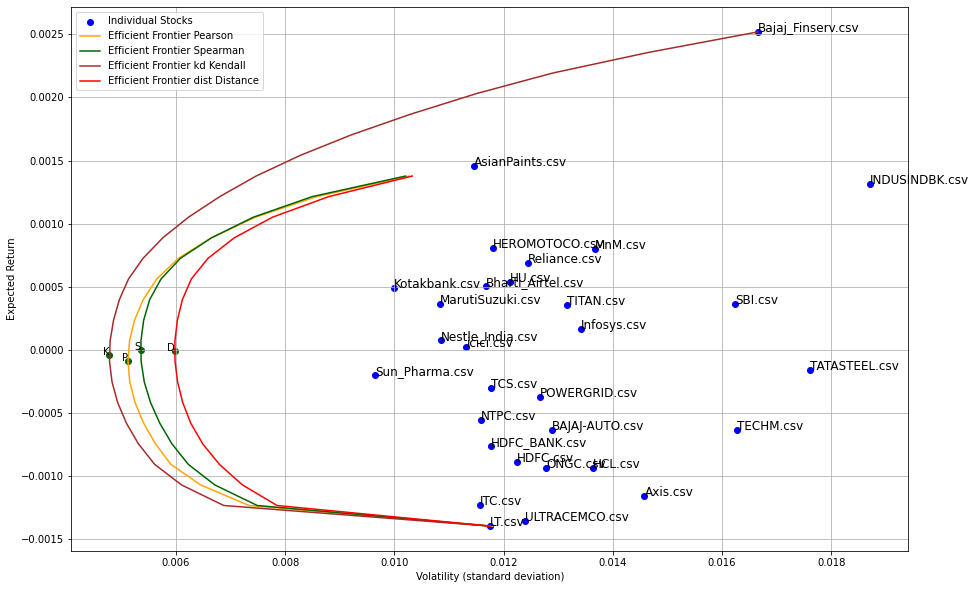

In [152]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10,10))

fig, ax = plt.subplots(figsize=(15,10))

# Plot volatility versus expected return for individual stocks
ax.scatter(x=std, y=delta,
           color='Blue', label='Individual Stocks')
for i, stock in enumerate(stocks):
    ax.annotate(stock, (std[i], delta[i]), size = 12)

# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility_p, y=minrisk_return_p, color='DarkGreen')
ax.annotate('P', (minrisk_volatility_p, minrisk_return_p),
           horizontalalignment='right')
# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility_sp, y=minrisk_return_sp, color='DarkGreen')
ax.annotate('S', (minrisk_volatility_sp, minrisk_return_sp),
            horizontalalignment='right')
# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility_ds, y=minrisk_return_ds, color='DarkGreen')
ax.annotate('D', (minrisk_volatility_ds, minrisk_return_ds),
            horizontalalignment='right')
# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility_kd, y=minrisk_return_kd, color='DarkGreen')
ax.annotate('K', (minrisk_volatility_kd, minrisk_return_kd),
            horizontalalignment='right')

# Plot efficient frontier
ax.plot(frontier_pearson[0], frontier_pearson[1], label='Efficient Frontier Pearson', color='Orange')
ax.plot(frontier_sp[0], frontier_sp[1], label='Efficient Frontier Spearman', color='DarkGreen')
ax.plot(frontier_kd[0], frontier_kd[1], label='Efficient Frontier kd Kendall', color='Brown')
ax.plot(frontier_dist[0], frontier_dist[1], label='Efficient Frontier dist Distance', color='Red')

# Format and display the final plot
#ax.axis([frontier[0].min()*0.7, frontier[0].max()*1.3, delta.min()*1.2, delta.max()*1.2])
ax.set_xlabel('Volatility (standard deviation)')
ax.set_ylabel('Expected Return')
ax.legend()
ax.grid()
plt.savefig('Efficient_Frontier.png')

In [142]:
# m = gp.Model('LC_risk')
# x = m.addVar(len(stocks))
# a = m.addVar()
# b = m.addVar()
# c = m.addVar()
# d = m.addVar()

# m.params.NonConvex = 2
# cov = a*Kendall_cov + b*spearman_cov + c*dist_cov + d*sigma
# portfolio_risk = x @ cov @ x
# portfolio_return = x @ delta
# m.setObjective(portfolio_return, GRB.MAXIMIZE)

# # Fix budget with a constraint
# m.addConstr(x.sum() == 1, 'budget')
# m.addConstr(a+b+c+d <= 1, 'Convex combination')
# m.addConstr(portfolio_risk <= gamma**2, 'Risk')
# #m.addConstr(x@delta >= 0.001, 'return')

# # Verify model formulation
# m.write('lcao.lp')

# # Optimize model to find the minimum risk portfolio
# m.optimize()

# w = x.X
# for i in range(len(stocks)):
#     if(w[i] <= 1e-3):
#         m.addConstr(x[i] == 0)

# m.optimize()

# minrisk_volatility = sqrt( x.X @ cov @ x.X)
# minrisk_return = (m.ObjVal)

# # return x.X, minrisk_return, minrisk_volatility

### 

In [143]:
lit = [i*0.05 for i in range(0, 50)]
results = []
lc = []
for a in lit:
    for b in lit:
        if (1-a-b > 0):
            cov = a*Kendall_cov + b*spearman_cov + dist_cov*(1-a-b) 
            results.append(port_opt_ret(cov, stocks, delta, 'Spearman', 0.01))
            lc.append((a,b))
        
        

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x2d261c0b
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [3e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual

   1   1.78136958e-04  3.32692361e-03  7.12e-02 1.60e-06  1.41e-02     0s
   2   1.13253791e-03  2.74538525e-03  9.23e-03 3.25e-07  6.79e-03     0s
   3   1.26784206e-03  1.99296917e-03  7.54e-03 5.25e-08  3.23e-03     0s
   4   1.59135920e-03  1.89570397e-03  2.46e-04 2.25e-10  1.27e-03     0s
   5   1.70492521e-03  1.75754400e-03  2.70e-10 2.05e-12  2.17e-04     0s
   6   1.72767129e-03  1.73885850e-03  4.84e-12 4.24e-12  4.62e-05     0s
   7   1.72908025e-03  1.72987592e-03  3.04e-13 1.05e-11  3.29e-06     0s
   8   1.72960755e-03  1.72961277e-03  6.43e-14 3.20e-10  2.16e-08     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.72960755e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerpri

  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422599e-03  1.33157393e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.79999377e-03  1.85133364e-03  2.29e-02 4.68e-02  5.62e-03     0s
   2   2.19521259e-03  2.50006968e-03  8.95e-03 9.06e-05  2.46e-03     0s
   3   1.60007418e-03  1.94217801e-03  1.52e-03 3.13e-05  2.65e-03     0s
   4   1.74634876e-03  1.80123693e-03  4.93e-04 2.08e-06  6.93e-04     0s
   5   1.72654394e-03  1.73619297e-03  5.42e-10 8.55e-08  6.18e-05     0s
   6   1


Barrier solved model in 7 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.73639779e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0xdf864e35
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1


 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38074396e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.78540770e-04  3.32701989e-03  6.75e-02 1.60e-06  1.40e-02     0s
   2   1.15587757e-03  2.71914275e-03  7.41e-03 2.52e-07  6.56e-03     0s
   3   1.20975676e-03  2.21212715e-03  5.93e-03 1.20e-07  4.30e-03     0s
   4   1.60988078e-03  2.06114219e-03  6.53e-09 3.33e-12  1.86e-03     0s
   5   1.68697920e-03  1.77134078e-03  4.22e-15 3.27e-13  3.48e-04     0s
   6   1.73519990e-03  1.74528044e-03  6.22e-15 9.88e-13  4.16e-05     0s
   7   1.74073620e-03  1.74198164e-03  3.77e-15 8.90e-11  5.14e-06     0s
   8   1.74142032e-03  1.74145663e-03  1.10e-13 8.60e-11  1.50e-07     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.74142032e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(T

Model fingerprint: 0xf54efe8b
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 25 rows and 25 columns
Presolve time: 0.01s
Presolved: 7 rows, 11 columns, 26 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.000e+01
 Factor NZ  : 2.800e+01
 Factor Ops : 1.400e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.75011234e-03  1.16672732e-03  5.00e-01 1.95e-01  2.77e-02     0s
   1   1.61203024e-03  1.73633937e-03  2.31e-02 5.49e-02  5.74e-03     0s
   2   2.04973757e-03  2.48049070e-03  1.03e-02 6.04e-08  2.78e-03     0s
   3   1.87075836e-03  2.00523419e-03  4

   5   1.74035804e-03  1.75243485e-03  9.45e-08 1.08e-07  7.74e-05     0s
   6   1.74804823e-03  1.74822455e-03  1.88e-11 6.72e-10  1.13e-06     0s
   7   1.74813350e-03  1.74814027e-03  2.02e-12 2.57e-10  4.33e-08     0s

Barrier solved model in 7 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.74813350e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x8f3802e4
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [3e-06, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 non

Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38072720e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.78952814e-04  3.32711501e-03  6.36e-02 1.60e-06  1.39e-02     0s
   2   1.18294630e-03  2.67401454e-03  5.52e-03 1.54e-07  6.23e-03     0s
   3   1.10389322e-03  2.38083909e-03  3.52e-03 9.42e-08  5.34e-03     0s
   4   1.58254007e-03  1.93284484e-03  3.87e-09 1.70e-09  1.45e-03     0s
   5   1.64941996e-03  1.79379985e-03  1.15e-10 1.07e-10  5.96e-04     0s
   6   1.74565020e-03  1.76180934e-03  4.16e-12 1.50e-11  6.67e-05     0s
   7   1.75209329e-03  1.75375003e-03  1.10e-13 8.77e-12  6.84e-06     0s
   8   1.75312258e-0


Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.75641387e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0xc9d178fa
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [7e-07, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    :


Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422631e-03  1.33157424e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.79995202e-03  1.85142326e-03  2.30e-02 4.68e-02  5.62e-03     0s
   2   2.19553695e-03  2.50006829e-03  8.98e-03 9.05e-05  2.45e-03     0s
   3   1.60589935e-03  1.94548994e-03  1.57e-03 3.16e-05  2.65e-03     0s
   4   1.75006587e-03  1.79317139e-03  5.04e-04 1.88e-06  6.28e-04     0s
   5   1.72015358e-03  1.73564968e-03  6.78e-07 2.52e-09  9.95e-05     0s
   6   1.73111580e-03  1.73185256e-03  1.41e-08 4.02e-11  4.72e-06     0s
   7   1.73163605e-03  1.73164374e-03  1.72e-10 1.37e-10  4.93e-08     0s

Barrier solved model in 7 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.73163605e-03

Set parameter NonConvex to val

Optimal objective 1.73493140e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0xcf8edc23
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal   

   0  -1.38074059e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.78519967e-04  3.32701443e-03  6.77e-02 1.60e-06  1.40e-02     0s
   2   1.15056666e-03  2.72195073e-03  7.75e-03 2.60e-07  6.60e-03     0s
   3   1.27268514e-03  2.20737620e-03  6.32e-03 1.16e-07  4.03e-03     0s
   4   1.58699399e-03  1.95130739e-03  6.95e-09 3.50e-11  1.50e-03     0s
   5   1.71123459e-03  1.78261830e-03  6.78e-11 4.92e-12  2.95e-04     0s
   6   1.73552188e-03  1.74441505e-03  3.01e-16 4.33e-10  3.67e-05     0s
   7   1.73994301e-03  1.74009480e-03  3.69e-16 1.48e-10  6.27e-07     0s

Barrier solved model in 7 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.73994301e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerpri

Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.00s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422621e-03  1.33157414e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80010223e-03  1.85112279e-03  2.26e-02 4.68e-02  5.61e-03     0s
   2   2.19445518e-03  2.50006196e-03  8.86e-03 9.07e-05  2.46e-03     0s
   3   1.60381835e-03  1.94539330e-03  1.60e-03 3.15e-05  2.67e-03     

   5   1.73843693e-03  1.75127994e-03  1.44e-07 9.63e-08  8.23e-05     0s
   6   1.74650914e-03  1.74671418e-03  1.77e-13 9.56e-10  1.31e-06     0s
   7   1.74660867e-03  1.74661451e-03  1.90e-13 9.99e-12  3.74e-08     0s

Barrier solved model in 7 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.74660867e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x03b12128
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 non

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38072383e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.78931479e-04  3.32710962e-03  6.39e-02 1.60e-06  1.40e-02     0s
   2   1.17701776e-03  2.66951767e-03  5.87e-03 1.55e-07  6.24e-03     0s
   3   1.15141299e-03  2.40322443e-03  4.26e-03 9.87e-08  5.25e-03     0s
   4   1.54343478e-03  1.94585988e-03  4.69e-09 1.01e-08  1.66e-03     0s
   5   1.66032025e-03  1.81942735e-03  1.64e-13 3.20e-13  6.57e-04     0s
   6   1.73211180e-03  1.76087177e-03  9.68e-14 4.90e-13  1.19e-04     0s
   7   1.75131760e-03  1.75222057e-03  2.86e-14 3.82e-12  3.73e-06     0s
   8   1.75153473e-03  1.75156563e-03  1.88e-13 3.93e-10  1.28e-07     0s

Barrier solved model in 8 iterations and 

Optimal objective 1.75479368e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0xc50118aa
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [6e-07, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal

   1   1.80030019e-03  1.85072848e-03  2.21e-02 4.69e-02  5.60e-03     0s
   2   2.19303293e-03  2.50004355e-03  8.69e-03 9.10e-05  2.46e-03     0s
   3   1.60368083e-03  1.94514338e-03  1.63e-03 3.13e-05  2.68e-03     0s
   4   1.76691648e-03  1.84393735e-03  4.61e-04 3.82e-06  7.71e-04     0s
   5   1.75171858e-03  1.76183307e-03  2.16e-08 1.04e-07  6.48e-05     0s
   6   1.75800154e-03  1.75817461e-03  6.65e-11 5.52e-10  1.11e-06     0s
   7   1.75808895e-03  1.75809721e-03  1.23e-12 2.54e-10  5.29e-08     0s

Barrier solved model in 7 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.75808895e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0xfc43685a
Model has 1 quadratic con

  Matrix range     [1e+00, 1e+00]
  QMatrix range    [3e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38073962e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.78441174e-04  3.32699526e-03  6.85e-02 1.60e-06  1.40e-02     0s
   2   1.14198210e-03  2.72885707e-03  8.35e-03 2.78e-07  6.67e-03     0s
   3   1.27464095e-03  2.16155587e-03  6.80e-03 1.02e-07  3.85e-03     0s
   4   1.58556696e-03  1.90140045e-03  7.48e-09 1.67e-11  1.30e-03     0s
   5   1.69745407

   8   1.74018712e-03  1.74035794e-03  2.74e-14 4.67e-11  7.05e-07     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.74018712e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0x7dfa212c
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.02s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+0


                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422651e-03  1.33157444e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80008141e-03  1.85117036e-03  2.27e-02 4.68e-02  5.61e-03     0s
   2   2.19462856e-03  2.50006055e-03  8.87e-03 9.06e-05  2.46e-03     0s
   3   1.60905284e-03  1.94867616e-03  1.64e-03 3.18e-05  2.67e-03     0s
   4   1.75855611e-03  1.81069866e-03  5.16e-04 1.91e-06  6.74e-04     0s
   5   1.73434647e-03  1.74687519e-03  1.31e-07 8.22e-08  8.03e-05     0s
   6   1.74347932e-03  1.74373255e-03  8.42e-10 2.15e-09  1.62e-06     0s
   7   1.74359543e-03  1.74360043e-03  3.22e-11 3.24e-11  3.20e-08     0s

Barrier solved model in 7 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.74359543e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|A


Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x97b8dfb1
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38072285e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.78850964e-04  3.32709069e-03  6.47e-02 1.60e-06  1.40e-02     0s
   2   1.16728736e-03  2.67875721e-03  6.49e-03 1.77e-07  6.33e-03     0s
   3   1.19025812e-0

   4   1.53465921e-03  1.94793957e-03  4.91e-09 9.41e-09  1.71e-03     0s
   5   1.63443850e-03  1.78840243e-03  7.60e-12 1.29e-11  6.36e-04     0s
   6   1.72499327e-03  1.75829324e-03  4.46e-14 5.28e-12  1.37e-04     0s
   7   1.75042625e-03  1.75239420e-03  3.71e-14 1.89e-11  8.13e-06     0s
   8   1.75158010e-03  1.75174017e-03  6.73e-13 3.19e-10  6.61e-07     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.75158010e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0x8ca10982
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range   

Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422640e-03  1.33157433e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80023439e-03  1.85086529e-03  2.23e-02 4.69e-02  5.60e-03     0s
   2   2.19352812e-03  2.50004790e-03  8.74e-03 9.08e-05  2.46e-03     0s
   3   1.60845587e-03  1.94851141e-03  1.67e-03 3.17e-05  2.68e-03     0s
   4   1.76666046e-03  1.83285138e-03  4.90e-04 2.96e-06  7.25e-04     0s
   5   1.74817049e-03  1.75898958e-03  6.23e-08 9.11e-08  6.93e-05     0s
   6   1.75484618e-03  1.75503986e-03  1.51e-10 4.96e-10  1.24e-06     0s
   7   1.75494981e-03  1.75495861e-03  1.09e-11 3.07e-10  5.63e-08     0s

B

Optimal objective 1.75817447e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0xc57f014c
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [3e-06, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.02s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal   

   0  -1.38070130e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.79390478e-04  3.32721163e-03  5.97e-02 1.60e-06  1.39e-02     0s
   2   1.21644167e-03  2.55781001e-03  3.44e-03 1.80e-12  5.59e-03     0s
   3   5.43084322e-04  2.34110013e-03  3.78e-09 1.33e-12  7.42e-03     0s
   4   1.42879060e-03  5.06612217e-03  1.38e-09 2.56e-13  1.50e-02     0s
   5   1.60730352e-03  1.86971828e-03  1.55e-15 5.17e-12  1.08e-03     0s
   6   1.73842532e-03  1.78565333e-03  3.11e-15 4.21e-12  1.95e-04     0s
   7   1.76239011e-03  1.76590414e-03  2.00e-15 3.31e-12  1.45e-05     0s
   8   1.76295715e-03  1.76305705e-03  1.84e-14 4.49e-11  4.12e-07     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.76295715e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [3e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422682e-03  1.33157476e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80003914e-03  1.85126085e-03  2.28e-02 4.68e-02  5.61e-03     0s
   2   2.19495730e-03  2.50006036e-03  8.90e-03 9.05e-05  2.46e-03     0s
   3   1.61458319e-03  1.95193857e-03  1.69e-03 3.21e-05  2.66e-03     

   4   1.76236792e-03  1.80830932e-03  5.34e-04 1.50e-06  6.44e-04     0s
   5   1.73664600e-03  1.74903940e-03  1.42e-07 6.65e-08  7.94e-05     0s
   6   1.74546904e-03  1.74572957e-03  9.38e-10 1.69e-09  1.67e-06     0s
   7   1.74559294e-03  1.74559775e-03  3.15e-11 2.63e-11  3.08e-08     0s

Barrier solved model in 7 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.74559294e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0xa7c6a7fb
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [

  QRHS range       [1e-04, 1e-04]
Presolve time: 0.00s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38071470e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.78948282e-04  3.32711236e-03  6.38e-02 1.60e-06  1.40e-02     0s
   2   1.16949291e-03  2.64722175e-03  6.29e-03 1.36e-07  6.19e-03     0s
   3   1.17516205e-03  2.41961076e-03  4.91e-03 9.05e-08  5.22e-03     0s
   4   1.60918524e-03  1.95030238e-03  5.41e-09 9.31e-09  1.41e-03     0s
   5   1.66501673e-03  1.77963812e-03  2.28e-14 2.65e-10  4.73e-04     0s
   6   1.74406388e-03  1.75377155e-03  4.92e-14 2.27e-11  4.01e-05     0s
   7   1.74955630e-03  1.75048534e-03  


Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.75354226e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0x0ffec73f
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    :


                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422669e-03  1.33157462e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80023519e-03  1.85086965e-03  2.23e-02 4.69e-02  5.60e-03     0s
   2   2.19354564e-03  2.50004481e-03  8.74e-03 9.08e-05  2.46e-03     0s
   3   1.61349658e-03  1.95174834e-03  1.72e-03 3.20e-05  2.68e-03     0s
   4   1.77019555e-03  1.83023175e-03  5.08e-04 2.52e-06  6.96e-04     0s
   5   1.75017521e-03  1.76080218e-03  6.56e-08 8.10e-08  6.81e-05     0s
   6   1.75667162e-03  1.75686401e-03  9.71e-11 4.18e-10  1.23e-06     0s
   7   1.75677528e-03  1.75678392e-03  5.67e-12 5.08e-10  5.52e-08     0s

Barrier solved model in 7 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.75677528e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|A


Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x789fd98c
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [6e-07, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38069793e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.79368602e-04  3.32720633e-03  5.99e-02 1.60e-06  1.39e-02     0s
   2   1.20990616e-03  2.55214438e-03  3.79e-03 1.72e-12  5.59e-03     0s
   3   4.73555021e-0

   3   6.28283718e-04  2.35482293e-03  3.56e-09 1.23e-12  7.13e-03     0s
   4   1.40788445e-03  3.03403058e-03  1.57e-09 3.41e-13  6.71e-03     0s
   5   1.55624515e-03  1.84261224e-03  1.78e-15 2.79e-12  1.18e-03     0s
   6   1.75435454e-03  1.77465617e-03  2.22e-15 3.31e-12  8.38e-05     0s
   7   1.76443057e-03  1.76488343e-03  5.33e-15 3.50e-11  1.87e-06     0s
   8   1.76469076e-03  1.76470782e-03  8.88e-16 1.26e-09  7.04e-08     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.76469076e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0x648c1bdb
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-06, 4e-04]
  Object

  QMatrix range    [9e-07, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422658e-03  1.33157451e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80039154e-03  1.85055901e-03  2.19e-02 4.69e-02  5.59e-03     0s
   2   2.19242178e-03  2.50002406e-03  8.61e-03 9.10e-05  2.46e-03     0s
   3   1.61452550e-03  1.95149906e-03  1.75e-03 3.18e-05  2.68e-03     0s
   4   1.78101441e-03  1.84891941e-03  4.61e-04 1.94e-06  7.38e-04     0s
   5   1.75791

   4   1.76724694e-03  1.80957863e-03  5.48e-04 1.26e-06  6.25e-04     0s
   5   1.74100475e-03  1.75271614e-03  1.24e-07 5.56e-08  7.50e-05     0s
   6   1.74901146e-03  1.74934364e-03  7.98e-10 1.09e-09  2.13e-06     0s
   7   1.74922842e-03  1.74923339e-03  1.61e-11 1.72e-11  3.18e-08     0s

Barrier solved model in 7 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.74922842e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0xffe03b17
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [

Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38070414e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.79105828e-04  3.32714742e-03  6.24e-02 1.60e-06  1.39e-02     0s
   2   1.17591721e-03  2.59836605e-03  5.82e-03 6.95e-08  5.95e-03     0s
   3   1.13016318e-03  2.37599615e-03  4.51e-03 4.40e-08  5.22e-03     0s
   4   1.56805844e-03  1.94527957e-03  4.97e-09 4.46e-09  1.56e-03     0s
   5   1.66126785e-03  1.78943823e-03  2.28e-11 1.63e-10  5.29e-04     0s
   6   1.74510096e-03  1.75896774e-03  6.37e-13 1.47e-11  5.73e-05     0s
   7   1.75259082e-03  1.75509260e-03  8.49e-14 4.18e-12  1.03e-05     0s
   8   1.75339499e-0

   8   1.75702024e-03  1.75710821e-03  1.20e-13 1.06e-10  3.63e-07     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.75702024e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0x768af10a
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+0

Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422696e-03  1.33157489e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80025812e-03  1.85082998e-03  2.22e-02 4.69e-02  5.60e-03     0s
   2   2.19340450e-03  2.50003926e-03  8.71e-03 9.08e-05  2.46e-03     0s
   3   1.61858948e-03  1.95492451e-03  1.78e-03 3.22e-05  2.68e-03     0s
   4   1.77488864e-03  1.83063778e-03  5.21e-04 2.22e-06  6.72e-04     0s
   5   1.75397928e-03  1.76410186e-03  5.35e-08 7.26e-08  6.48e-05     0s
   6   1.76011485e-03  1.76030265e-03  5.47e-11 3.58e-10  1.20e-06     0s
   7   1.76021931e-03  1.76022747e-03  2.95e-12 6.26e-11  5.23e-08     0s

Barrier solved model in 7 iterations and 0.03 seconds (0.00 work

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x76abffcd
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-07, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.380687

   0  -1.38068259e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.79652162e-04  3.32726742e-03  5.73e-02 1.60e-06  1.39e-02     0s
   2   1.22787745e-03  2.52315575e-03  2.74e-03 1.92e-12  5.39e-03     0s
   3   5.96397467e-04  2.34220757e-03  3.02e-09 1.51e-12  7.21e-03     0s
   4   1.41437516e-03  3.60899658e-03  1.30e-09 5.83e-13  9.06e-03     0s
   5   1.61011786e-03  1.88458764e-03  1.55e-15 4.36e-12  1.13e-03     0s
   6   1.74682548e-03  1.78781615e-03  6.66e-16 1.46e-11  1.69e-04     0s
   7   1.76316675e-03  1.76978634e-03  1.33e-15 1.81e-11  2.73e-05     0s
   8   1.76789435e-03  1.76804696e-03  1.67e-14 3.71e-11  6.30e-07     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.76789435e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0x5f9848a4
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [8e-07, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422685e-03  1.33157478e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80041494e-03  1.85051856e-03  2.18e-02 4.69e-

   2   2.19421484e-03  2.50004775e-03  8.80e-03 9.06e-05  2.46e-03     0s
   3   1.62372174e-03  1.95822666e-03  1.81e-03 3.26e-05  2.68e-03     0s
   4   1.77311763e-03  1.81407310e-03  5.58e-04 1.16e-06  6.14e-04     0s
   5   1.74711151e-03  1.75931505e-03  1.87e-07 4.86e-08  7.82e-05     0s
   6   1.75428880e-03  1.75451160e-03  2.33e-13 5.22e-10  1.43e-06     0s
   7   1.75441905e-03  1.75442440e-03  6.36e-13 6.94e-11  3.43e-08     0s

Barrier solved model in 7 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.75441905e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x049a193d
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatri

  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38069119e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.79325001e-04  3.32719569e-03  6.04e-02 1.60e-06  1.39e-02     0s
   2   1.19728789e-03  2.54125206e-03  4.49e-03 1.79e-12  5.61e-03     0s
   3   9.16188941e-04  2.38849845e-03  3.02e-03 1.22e-12  6.13e-03     0s
   4   1.34278324e-03  1.96391422e-03  3.32e-09 5.19e-13  2.56e-03     0s
   5   1.66158950

   5   1.56961711e-03  1.91194390e-03  2.62e-10 5.95e-12  1.41e-03     0s
   6   1.75202547e-03  1.76726662e-03  2.22e-16 7.74e-13  6.29e-05     0s
   7   1.76174151e-03  1.76236292e-03  2.22e-16 1.40e-11  2.57e-06     0s
   8   1.76210314e-03  1.76218171e-03  2.53e-14 2.71e-09  3.24e-07     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.76210314e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0xed8f6482
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 

Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422722e-03  1.33157515e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80030336e-03  1.85074596e-03  2.21e-02 4.69e-02  5.60e-03     0s
   2   2.19310299e-03  2.50003056e-03  8.67e-03 9.08e-05  2.46e-03     0s
   3   1.62383033e-03  1.95803638e-03  1.84e-03 3.25e-05  2.68e-03     0s
   4   1.78065651e-03  1.83375683e-03  5.30e-04 2.06e-06  6.54e-04     0s
   5   1.75944476e-03  1.76883439e-03  2.89e-08 6.65e-08  6.01e-05     0s
   6   1.76510007e-03  1.76528238e-03  2.96e-11 3.02e-10  1.17e-06     0s
   7   1.76520115e-03  1.76520943e-03  2.44e-12 8.65e-12  5.30e-08     0s

Barrier solved model in 7 iterations and 0.04 seconds (0.00 work

Optimal objective 1.76826675e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x119fb5d8
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-06, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal   

 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38066964e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.79877414e-04  3.32731485e-03  5.52e-02 1.60e-06  1.38e-02     0s
   2   1.24224481e-03  2.49870924e-03  1.95e-03 1.86e-12  5.21e-03     0s
   3   5.47543475e-04  2.32179576e-03  1.68e-04 1.63e-12  7.33e-03     0s
   4   1.41294300e-03  2.56936717e-03  7.18e-05 1.42e-13  4.78e-03     0s
   5   1.66902155e-03  1.91008799e-03  2.94e-06 9.95e-13  9.96e-04     0s
   6   1.75640828e-03  1.77715540e-03  3.23e-12 1.52e-12  8.57e-05     0s
   7   1.77230927e-03  1.77344161e-03  5.66e-14 2.81e-11  4.68e-06     0s
   8   1.77278804e-03  1.77291028e-03  8.13e-14 3.46e-10  5.05e-07     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.77278804e-03

G

Optimal objective 1.75802107e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0xf06bffb2
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal

   0   1.86422756e-03  1.33157550e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80021556e-03  1.85092662e-03  2.23e-02 4.69e-02  5.60e-03     0s
   2   2.19376035e-03  2.50003852e-03  8.74e-03 9.06e-05  2.46e-03     0s
   3   1.62861263e-03  1.96130010e-03  1.87e-03 3.29e-05  2.68e-03     0s
   4   1.78174999e-03  1.79064439e-03  5.48e-04 7.30e-07  3.10e-04     0s
   5   1.75274556e-03  1.76776134e-03  1.45e-05 5.44e-10  1.03e-04     0s
   6   1.76103928e-03  1.76281514e-03  5.93e-08 3.42e-11  1.14e-05     0s
   7   1.76107028e-03  1.76107974e-03  6.14e-11 2.06e-12  6.06e-08     0s

Barrier solved model in 7 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.76107028e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 colum


Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x615bfedc
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.00s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38067585e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.79607830e-04  3.32725689e-03  5.78e-02 1.60e-06  1.39e-02     0s
   2   1.21441072e-03  2.51229527e-03  3.45e-03 1.76e-12  5.41e-03     0s
   3   4.90217197e-0

   5   1.54856741e-03  1.82242404e-03  2.97e-10 7.03e-12  1.13e-03     0s
   6   1.75630997e-03  1.77758433e-03  6.38e-12 1.41e-12  8.78e-05     0s
   7   1.76784398e-03  1.76874687e-03  2.13e-14 1.63e-11  3.73e-06     0s
   8   1.76861707e-03  1.76863521e-03  3.72e-14 5.19e-10  7.49e-08     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.76861707e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0x8bc59fa2
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [9e-06, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 

Presolve time: 0.02s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422746e-03  1.33157539e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80037134e-03  1.85061689e-03  2.19e-02 4.69e-02  5.59e-03     0s
   2   2.19263789e-03  2.50001751e-03  8.61e-03 9.08e-05  2.46e-03     0s
   3   1.62941062e-03  1.96107435e-03  1.90e-03 3.27e-05  2.68e-03     0s
   4   1.78943028e-03  1.83927234e-03  5.18e-04 1.37e-06  6.53e-04     0s
   5   1.76266148e-03  1.79088870e-03  1.09e-06 2.89e-09  1.81e-04     0s
   6   1.77058200e-03  1.77251514e-03  3.80e-11 4.19e-10  1.24e-05     0s
   7   1.77162281e-03  1.77165772e-03  4.49e-14 1.60e-11  2.23e-07     0s

B

Optimal objective 1.77464560e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x9d98b0be
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [5e-08, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.00s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal   

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38067487e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.79524536e-04  3.32723836e-03  5.86e-02 1.60e-06  1.39e-02     0s
   2   1.20316323e-03  2.51182616e-03  4.07e-03 1.67e-12  5.46e-03     0s
   3   9.43830211e-04  2.38513850e-03  2.76e-03 1.22e-12  6.00e-03     0s
   4   1.33283479e-03  1.97225490e-03  1.20e-03 4.83e-13  2.68e-03     0s
   5   1.46837124e-03  1.88698457e-03  3.90e-04 9.49e-13  1.74e-03     0s
   6   1.67635455e-03  1.78632051e-03  1.52e-05 1.68e-12  4.55e-04     0s
   7   1.74620588e-03  1.76867945e-03  1.66e-11 9.88e-12  9.28e-05     0s
   8   1.76201627e-03  1.76351319e-03  9.66e-14 1.85e-11  6.18e-06     0s
   9   1.76312393e-03  1.76315238e-03  6.87e-13 2.82e-10  1.17e-07     0s

Barrier solved model in 9 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.76312393e-03

Gurobi Opt

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0x1d2c3f1f
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422782e-03  1.33157575e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80026052e-03  1.85084306e-03  2.22e-02 4.69e-

   3   1.63392210e-03  1.96429824e-03  1.94e-03 3.31e-05  2.68e-03     0s
   4   1.76124530e-03  1.79171674e-03  3.63e-04 3.64e-11  3.70e-04     0s
   5   1.76274164e-03  1.77289705e-03  3.29e-06 3.57e-13  6.67e-05     0s
   6   1.76817154e-03  1.76964629e-03  3.63e-12 3.60e-12  9.44e-06     0s
   7   1.76909098e-03  1.76911414e-03  2.33e-14 1.91e-11  1.48e-07     0s

Barrier solved model in 7 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.76909098e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0xceae8e2e
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range

  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38065811e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.79957060e-04  3.32733064e-03  5.46e-02 1.60e-06  1.38e-02     0s
   2   1.23893631e-03  2.48529860e-03  2.09e-03 1.31e-08  5.17e-03     0s
   3   5.75717166e-04  2.32309948e-03  1.95e-05 9.83e-09  7.22e-03     0s
   4   9.55669818e-04  2.03008570e-03  2.14e-11 2.13e-13  4.44e-03     0s
   5   1.70177837e-03  2.11210594e-03  5.96e-13 4.83e-13  1.69e-03     0s
   6   1.75229730e-03  1.81196968e-03  1.78e-15 4.70e-12  2.46e-04     0s
   7   1.77149032e-03  1.77616610e-03  

   8   1.77621328e-03  1.77658090e-03  9.99e-15 5.76e-12  1.52e-06     0s
   9   1.77648817e-03  1.77649491e-03  1.32e-14 7.34e-10  2.78e-08     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.77648817e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0xb7d818f8
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-06, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time:


                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422768e-03  1.33157561e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80046269e-03  1.85044171e-03  2.17e-02 4.69e-02  5.59e-03     0s
   2   2.19200426e-03  2.49999829e-03  8.54e-03 9.09e-05  2.46e-03     0s
   3   1.63560679e-03  1.96402233e-03  1.96e-03 3.29e-05  2.68e-03     0s
   4   1.79714479e-03  1.84301625e-03  5.17e-04 3.81e-07  6.20e-04     0s
   5   1.77195153e-03  1.80111454e-03  5.69e-10 1.72e-12  1.87e-04     0s
   6   1.77732924e-03  1.78003549e-03  8.76e-13 1.02e-12  1.73e-05     0s
   7   1.77943046e-03  1.77947256e-03  1.93e-13 7.51e-12  2.69e-07     0s

Barrier solved model in 7 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.77943046e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|A

Model fingerprint: 0x7637c406
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38065953e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.79810120e-04  3.32729918e-03  5.60e-02 1.60e-06  1.38e-02     0s
   2   1.22125794e-03  2.48272817e-03  3.01e-03 1.75e-12  5.25e-03     0s
   3   5.60270734e-04  2.34945008e-03  1.15e-03 1.24e-12  7.41e-03     0s
   4

   8   1.77255824e-03  1.77258944e-03  4.51e-14 1.88e-10  1.29e-07     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.77255824e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0xecc504c5
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+0

   0   1.86422803e-03  1.33157596e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80037290e-03  1.85062565e-03  2.19e-02 4.69e-02  5.59e-03     0s
   2   2.19267666e-03  2.50001122e-03  8.60e-03 9.07e-05  2.46e-03     0s
   3   1.63950721e-03  1.96727889e-03  2.00e-03 3.33e-05  2.68e-03     0s
   4   1.78836841e-03  1.79533687e-03  3.84e-04 3.67e-11  2.39e-04     0s
   5   1.76938973e-03  1.77824080e-03  1.95e-07 3.69e-13  5.67e-05     0s
   6   1.77547168e-03  1.77567269e-03  5.54e-10 9.40e-13  1.29e-06     0s
   7   1.77548450e-03  1.77549054e-03  3.29e-12 2.11e-10  3.87e-08     0s

Barrier solved model in 7 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.77548450e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 colum

Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-06, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38064276e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.80249019e-04  3.32739059e-03  5.19e-02 1.60e-06  1.38e-02     0s
   2   1.26075840e-03  2.50458400e-03  9.97e-04 1.01e-07  5.15e-03     0s
   3   5.22016411e-04  2.31835039e-03  1.81e-05 7.57e-08  7.42e-03     0s
   4   1.41943382e-03  3.11870193e

   6   1.76690816e-03  1.79948577e-03  1.74e-14 4.62e-14  1.35e-04     0s
   7   1.78189775e-03  1.78291314e-03  1.03e-14 8.05e-12  4.19e-06     0s
   8   1.78269670e-03  1.78287553e-03  5.02e-14 9.16e-10  7.38e-07     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.78269670e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0x11021b87
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-07, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 19 

 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422836e-03  1.33157630e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80030653e-03  1.85076343e-03  2.21e-02 4.69e-02  5.59e-03     0s
   2   2.19318168e-03  2.50001879e-03  8.65e-03 9.06e-05  2.46e-03     0s
   3   1.64400215e-03  1.97044153e-03  2.04e-03 3.36e-05  2.68e-03     0s
   4   1.79643403e-03  1.80103032e-03  5.83e-04 3.71e-11  3.08e-04     0s
   5   1.77095850e-03  1.77707648e-03  6.41e-10 1.21e-12  3.92e-05     0s
   6   1.77316907e-03  1.77324404e-03  2.55e-12 9.38e-12  4.80e-07     0s

Barrier solved model in 6 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.77316907e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|

Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.02s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38064179e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.80162847e-04  3.32737246e-03  5.27e-02 1.60e-06  1.38e-02     0s
   2   1.24719559e-03  2.50227820e-03  1.64e-03 9.77e-08  5.20e-03     0s
   3   6.95060007e-04  2.37485734e-03  8.92e-04 7.95e-08  6.95e-03     0s
   4   1.12744311e-03  1.99032531e-03  9.81e-10 2.31e-13  3.56e-03 

   7   1.77964692e-03  1.78056264e-03  1.60e-14 1.46e-11  3.78e-06     0s
   8   1.78028893e-03  1.78036147e-03  4.30e-14 5.23e-10  3.00e-07     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.78028893e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0x8523bbb3
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [7e-06, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time:


                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422826e-03  1.33157619e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80046422e-03  1.85045051e-03  2.17e-02 4.69e-02  5.58e-03     0s
   2   2.19204330e-03  2.49999161e-03  8.53e-03 9.08e-05  2.46e-03     0s
   3   1.87917920e-03  1.93665738e-03  1.84e-03 2.44e-05  9.37e-04     0s
   4   1.79584515e-03  1.79586664e-03  1.90e-04 1.07e-06  9.27e-05     0s
   5   1.78465771e-03  1.78496639e-03  2.06e-05 1.36e-07  1.20e-05     0s
   6   1.78316043e-03  1.78325988e-03  2.26e-11 7.16e-09  6.37e-07     0s

Barrier solved model in 6 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.78316043e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up

Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [7e-07, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.02s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38062502e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.80609863e-04  3.32746277e-03  4.86e-02 1.60e-06  1.37e-02     0s
   2   1.28279092e-03  2.52710897e-03  5.35e-08 1.97e-07  5.14e-03     0s
   3   1.04604033e-03  2.13595666e-03  1.11e-13 9.94e-08  4.50e-03     0s
   4   1.60833496e-03  1.89211185e-03  1.15e-14 2.03e-13  1.17e-03 

   7   1.77738830e-03  1.78049823e-03  4.92e-10 3.18e-12  1.28e-05     0s
   8   1.77924456e-03  1.77997952e-03  1.03e-12 2.30e-10  3.03e-06     0s
   9   1.77955748e-03  1.77956335e-03  5.66e-13 1.26e-11  2.42e-08     0s

Barrier solved model in 9 iterations and 0.04 seconds (0.00 work units)
Optimal objective 1.77955748e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0x0151073d
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.02s
Presolved: 6 rows, 9 columns, 19 

Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422857e-03  1.33157651e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80041957e-03  1.85054490e-03  2.18e-02 4.69e-02  5.59e-03     0s
   2   2.19239165e-03  2.49999718e-03  8.56e-03 9.07e-05  2.46e-03     0s
   3   1.89086865e-03  1.94036773e-03  2.07e-03 2.54e-05  9.53e-04     0s
   4   1.80652353e-03  1.80216819e-03  3.42e-04 2.66e-06  1.37e-04     0s
   5   1.78195822e-03  1.78505855e-03  3.76e-10 3.55e-07  1.99e-05     0s
   6   1.78229022e-03  1.78253245e-03  3.55e-15 3.07e-08  1.55e-06     0s
   7   1.78236075e-03  1.78236273e-03  1.42e-13 4.92e-10  1.27e-08     0s

Barrier solved model in 7 iterations and 0.03 seconds (0.00 work

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x575d8c79
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [4e-07, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.380621

   0  -1.38061686e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.80715885e-04  3.32748326e-03  4.77e-02 1.60e-06  1.37e-02     0s
   2   1.28287753e-03  2.53534140e-03  5.24e-08 2.34e-07  5.17e-03     0s
   3   1.05806393e-03  2.12552878e-03  6.97e-14 1.09e-07  4.41e-03     0s
   4   1.69058295e-03  1.84727827e-03  1.78e-15 7.87e-09  6.47e-04     0s
   5   1.76495106e-03  1.80007037e-03  2.89e-15 1.48e-09  1.45e-04     0s
   6   1.78900962e-03  1.79000161e-03  6.22e-15 7.20e-11  4.10e-06     0s
   7   1.78934224e-03  1.78937589e-03  7.97e-14 9.98e-11  1.39e-07     0s

Barrier solved model in 7 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.78934224e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerpri

  QMatrix range    [1e-05, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422888e-03  1.33157681e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80039775e-03  1.85059409e-03  2.18e-02 4.69e-02  5.59e-03     0s
   2   2.19257606e-03  2.49999837e-03  8.57e-03 9.06e-05  2.46e-03     0s
   3   1.89463934e-03  1.94336839e-03  2.13e-03 2.57e-05  9.65e-04     0s
   4   1.81146459e-03  1.80313524e-03  3.98e-04 2.40e-06  1.39e-04     0s
   5   1.78278

Optimal objective 1.78575397e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x0fb7d938
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [7e-06, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal   

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38061110e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.80757269e-04  3.32749096e-03  4.73e-02 1.60e-06  1.37e-02     0s
   2   1.28278379e-03  2.53997679e-03  5.20e-08 2.56e-07  5.19e-03     0s
   3   1.12736970e-03  2.16358429e-03  9.01e-09 1.29e-07  4.28e-03     0s
   4   1.58662554e-03  1.89897359e-03  3.55e-14 1.17e-13  1.29e-03     0s
   5   1.74140281e-03  1.80851072e-03  3.51e-14 6.47e-13  2.77e-04     0s
   6   1.77366635e-03  1.79428699e-03  5.35e-14 8.57e-12  8.51e-05     0s
   7   1.78829861e-03  1.79052942e-03  6.77e-14 1.04e-11  9.21e-06     0s
   8   1.78987377e-03  1.78993719e-03  1.01e-13 8.49e-11  2.62e-07     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.78987377e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(T

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0x9c3447ea
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [5e-07, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.02s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422877e-03  1.33157670e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80055744e-03  1.85027788e-03  2.15e-02 4.69e-

   3   1.87521454e-03  1.94450238e-03  1.72e-03 2.47e-05  9.69e-04     0s
   4   1.83286695e-03  1.89612865e-03  6.63e-04 2.63e-11  6.43e-04     0s
   5   1.77561931e-03  1.80190491e-03  7.30e-10 6.05e-12  1.68e-04     0s
   6   1.78762429e-03  1.78978323e-03  8.36e-11 2.82e-12  1.38e-05     0s
   7   1.78787272e-03  1.78842643e-03  8.73e-12 6.81e-11  3.54e-06     0s
   8   1.78789681e-03  1.78791575e-03  1.53e-13 9.56e-12  1.21e-07     0s

Barrier solved model in 8 iterations and 0.04 seconds (0.00 work units)
Optimal objective 1.78789681e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0xd76aca6e
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatri


Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0xac7979da
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [3e-06, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38060294e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.80864066e-04  3.32751135e-03  4.63e-02 1.60e-06  1.37e-02     0s
   2   1.28284404e-03  2.54807869e-03  5.10e-08 2.91e-07  5.22e-03     0s
   3   7.28130436e-0

   5   1.70797489e-03  1.86681115e-03  3.33e-15 6.30e-10  6.56e-04     0s
   6   1.77363737e-03  1.81082405e-03  2.22e-15 8.16e-11  1.54e-04     0s
   7   1.79342604e-03  1.79541214e-03  4.11e-15 7.92e-12  8.20e-06     0s
   8   1.79462493e-03  1.79464105e-03  4.22e-15 1.17e-11  6.66e-08     0s

Barrier solved model in 8 iterations and 0.04 seconds (0.00 work units)
Optimal objective 1.79462493e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0x134c0b9a
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-06, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 

Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422903e-03  1.33157696e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80060448e-03  1.85019085e-03  2.13e-02 4.69e-02  5.58e-03     0s
   2   2.19110765e-03  2.49995037e-03  8.40e-03 9.09e-05  2.46e-03     0s
   3   1.81977266e-03  1.93941484e-03  5.95e-04 2.12e-05  9.50e-04     0s
   4   1.77887243e-03  1.87060477e-03  3.86e-04 1.07e-05  7.31e-04     0s
   5   1.80600691e-03  1.82756029e-03  1.72e-04 1.09e-11  2.12e-04     0s
   6   1.79714459e-03  1.79969121e-03  5.40e-07 4.43e-12  1.66e-05     0s
   7   1.79726844e-03  1.79734706e-03  5.67e-13 5.47e-11  5.03e-07     0s

Barrier solved model in 7 iterations and 0.03 seconds (0.00 work

Optimal objective 1.79402010e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x2361916c
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [3e-06, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal   

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38058760e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.81169882e-04  3.32756946e-03  4.35e-02 1.60e-06  1.36e-02     0s
   2   1.28330271e-03  2.56675832e-03  4.79e-08 3.61e-07  5.30e-03     0s
   3   9.32330071e-04  2.36462365e-03  3.75e-08 2.57e-07  5.91e-03     0s
   4   1.36331314e-03  1.97827232e-03  6.11e-14 3.64e-08  2.54e-03     0s
   5   1.72118536e-03  1.85079105e-03  1.31e-14 2.17e-10  5.35e-04     0s
   6   1.78562660e-03  1.80771115e-03  2.66e-15 2.81e-11  9.12e-05     0s
   7   1.79770176e-03  1.79805272e-03  2.26e-17 4.01e-12  1.45e-06     0s
   8   1.79796586e-03  1.79797548e-03  3.97e-14 1.64e-10  3.97e-08     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.79796586e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Th

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0xc6831d6c
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [6e-07, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.02s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422930e-03  1.33157723e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80062847e-03  1.85014936e-03  2.13e-02 4.69e-02  5.57e-03     0s
   2   2.19096051e-03  2.49994089e-03  8.38e-03 9.09e-05 

   2   2.19148623e-03  2.49995532e-03  8.43e-03 9.07e-05  2.46e-03     0s
   3   1.82812699e-03  1.94525944e-03  7.31e-04 2.21e-05  9.74e-04     0s
   4   1.78461969e-03  1.87906401e-03  4.72e-04 1.19e-05  7.78e-04     0s
   5   1.81039895e-03  1.83185746e-03  2.17e-04 1.29e-11  2.32e-04     0s
   6   1.79846383e-03  1.80158134e-03  2.39e-10 1.04e-12  2.00e-05     0s
   7   1.79846221e-03  1.79878241e-03  1.51e-14 1.88e-11  2.05e-06     0s
   8   1.79873870e-03  1.79874027e-03  9.77e-14 7.62e-11  1.00e-08     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.79873870e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0xff13c52c
Model has 1 quadratic con

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x6ab5e547
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [8e-07, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.01s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38057465e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.81413178e-04  3.32761450e-03  4.13e-02 1.60e-06  1.36e-02     0s
   2   1.28352799e

   1   1.81388602e-04  3.32760958e-03  4.16e-02 1.60e-06  1.36e-02     0s
   2   1.28325872e-03  2.58283335e-03  4.58e-08 4.23e-07  5.37e-03     0s
   3   1.27304057e-03  2.18405199e-03  3.97e-08 1.71e-07  3.76e-03     0s
   4   1.69390239e-03  1.95333693e-03  8.84e-14 2.45e-13  1.07e-03     0s
   5   1.75889090e-03  1.81736874e-03  4.35e-14 7.53e-13  2.41e-04     0s
   6   1.79845215e-03  1.80654859e-03  4.31e-13 5.19e-12  3.34e-05     0s
   7   1.80126475e-03  1.80258610e-03  4.86e-13 1.16e-11  5.46e-06     0s
   8   1.80213502e-03  1.80215166e-03  1.36e-13 1.06e-10  6.87e-08     0s

Barrier solved model in 8 iterations and 0.04 seconds (0.00 work units)
Optimal objective 1.80213502e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerpri

Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [3e-06, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.02s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86422987e-03  1.33157780e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80062994e-03  1.85015822e-03  2.13e-02 4.69e-02  5.57e-03     0s
   2   2.19100454e-03  2.49993418e-03  8.37e-03 9.08e-05  2.46e-03     0s
   3   1.82923870e-03  1.94648858e-03  7.58e-04 2.10e-05  9.82e-04     

   3   1.82783176e-03  1.94609438e-03  7.41e-04 2.05e-05  9.83e-04     0s
   4   1.78960407e-03  1.88152897e-03  4.78e-04 1.02e-05  7.61e-04     0s
   5   1.81881229e-03  1.84713805e-03  2.34e-04 1.20e-11  2.78e-04     0s
   6   1.80675762e-03  1.80993515e-03  1.00e-06 1.30e-12  2.08e-05     0s
   7   1.80679449e-03  1.80731779e-03  1.10e-12 7.80e-13  3.35e-06     0s
   8   1.80720633e-03  1.80720753e-03  2.16e-15 5.42e-11  7.72e-09     0s

Barrier solved model in 8 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.80720633e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x96e2a1db
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatri


Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x2070363d
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-06, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve time: 0.02s
Presolved: 32 rows, 61 columns, 526 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+02
 Factor NZ  : 5.280e+02
 Factor Ops : 1.144e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.38055354e-04 -0.00000000e+00  3.00e+00 1.46e+00  9.93e-02     0s
   1   1.81771465e-04  3.32767888e-03  3.81e-02 1.60e-06  1.36e-02     0s
   2   1.28355556e-03  2.49314425e-03  4.19e-08 4.94e-08  4.99e-03     0s
   3   1.28539803e-0

   3   1.29135894e-03  2.30800781e-03  3.65e-08 2.93e-08  4.20e-03     0s
   4   1.68503485e-03  1.98611251e-03  1.34e-11 3.45e-10  1.24e-03     0s
   5   1.70968669e-03  1.82551907e-03  6.50e-12 7.45e-11  4.78e-04     0s
   6   1.80514649e-03  1.81583664e-03  7.85e-13 7.11e-14  4.41e-05     0s
   7   1.81045204e-03  1.81153468e-03  6.27e-14 7.38e-12  4.47e-06     0s
   8   1.81137638e-03  1.81140310e-03  2.20e-14 1.39e-10  1.10e-07     0s

Barrier solved model in 8 iterations and 0.04 seconds (0.00 work units)
Optimal objective 1.81137638e-03

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0xabb509c2
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-06, 4e-04]
  Object


Optimize a model with 27 rows, 30 columns and 56 nonzeros
Model fingerprint: 0x200ba217
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [5e-07, 4e-04]
  Objective range  [2e-05, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [1e-04, 1e-04]
Presolve removed 26 rows and 26 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 19 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.400e+01
 Factor NZ  : 2.100e+01
 Factor Ops : 9.100e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.86423039e-03  1.33157832e-03  4.00e-01 1.71e-01  2.75e-02     0s
   1   1.80072515e-03  1.84998225e-03  2.10e-02 4.69e-02  5.57e-03     0s
   2   2.19036925e-03  2.49990018e-03  8.28e-03 9.09e-05

   2   2.19022071e-03  2.49988928e-03  8.26e-03 9.08e-05  2.46e-03     0s
   3   1.83726995e-03  1.95408285e-03  8.92e-04 2.08e-05  1.02e-03     0s
   4   1.80494893e-03  1.89330620e-03  5.48e-04 1.06e-05  7.60e-04     0s
   5   1.83113590e-03  1.85861581e-03  2.82e-04 1.24e-11  2.90e-04     0s
   6   1.81642750e-03  1.82050344e-03  3.41e-06 3.09e-12  2.77e-05     0s
   7   1.81659727e-03  1.81725300e-03  3.77e-12 2.09e-11  4.20e-06     0s
   8   1.81712456e-03  1.81713222e-03  4.30e-14 9.05e-11  4.90e-08     0s

Barrier solved model in 8 iterations and 0.04 seconds (0.00 work units)
Optimal objective 1.81712456e-03

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0xbd0c01f1
Model has 1 quadratic con

In [140]:
x_data = [a for a,b in lc]
y_data = [b for a,b in lc]
z_data = [r for w,r,v in results]

In [141]:
x_data = np.array(x_data)
y_data = np.array(y_data)
z_data = np.array(z_data)*100

<Figure size 432x288 with 0 Axes>

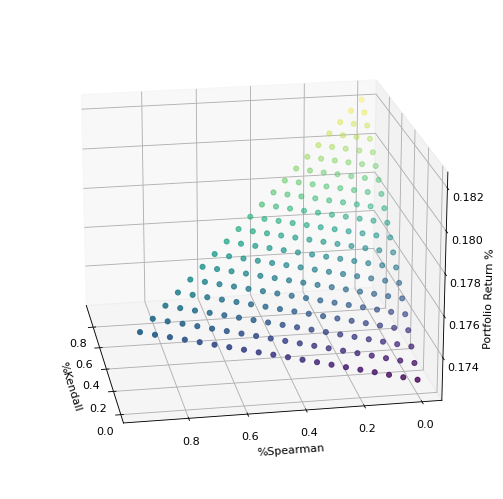

In [144]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
plt.figure(figsize=(8, 8), dpi=80)
ax = plt.axes(projection='3d')

ax.scatter3D(x_data, y_data, z_data, c=z_data)
ax.set_xlabel('%Kendall', )
ax.set_ylabel('%Spearman')
ax.set_zlabel('Portfolio Return %')
ax.view_init(20, 170)
plt.savefig('a.png')

In [64]:
max(z_data)

0.0018219454539572274

In [104]:
help(ax.set_zlabel)

Help on method set_zlabel in module mpl_toolkits.mplot3d.axes3d:

set_zlabel(zlabel, fontdict=None, labelpad=None, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    Set zlabel.  See doc for `.set_ylabel` for description.



In [158]:
import pypfopt
mu = pypfopt.expected_returns.ema_historical_return(data.iloc[60:120], returns_data=False, compounding=True, log_returns=False)
mu = mu.to_numpy()
#mu = mu/252
mu = mu / 252

In [174]:
# Create an empty model
m = gp.Model('portfolio')

# Add matrix variable for the stocks
x = m.addMVar(len(stocks))

# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks
portfolio_risk_p = x @ sigma @ x
m.setObjective(portfolio_risk_p, GRB.MINIMIZE)

# Fix budget with a constraint
m.addConstr(x.sum() == 1, 'budget')

#m.addConstr(x@delta >= 0.001, 'return')

# Verify model formulation
m.write('portfolio_selection_optimization.lp')

# Optimize model to find the minimum risk portfolio
m.optimize()
 
# w = x.X
# for i in range(len(stocks)):
#     if(w[i] <= 1e-3):
#         m.addConstr(x[i] == 0)

# m.optimize()

minrisk_volatility_p = sqrt(m.ObjVal)
minrisk_return_p = mu @ x.X
#print(minrisk_return,minrisk_volatility)

# Create an expression representing the expected return for the portfolio
portfolio_return_p = mu @ x
target = m.addConstr(portfolio_return_p == minrisk_return_p, 'target')

# Solve for efficient frontier by varying target return
frontier_pearson = np.empty((2,0))
for r in np.linspace(mu.min(), mu.max(), 25):
    target.rhs = r
    m.optimize()
    frontier_pearson = np.append(frontier_pearson, [[sqrt(m.ObjVal)],[r]], axis=1)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0xc9e73cef
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 1 rows, 30 columns, 30 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.350e+02
 Factor NZ  : 4.650e+02
 Factor Ops : 9.455e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.90269859e+05 -2.902

 Free vars  : 29
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.90167188e+05 -2.90167188e+05  2.20e+04 1.54e-03  1.00e+06     0s
   1   6.19053037e+04 -6.19233124e+04  1.69e+03 1.19e-04  8.00e+04     0s
   2   5.28388125e+00 -2.81325116e+01  1.41e+01 9.90e-07  6.75e+02     0s
   3   1.56070675e-04 -2.27215581e+01  3.60e-02 2.53e-09  2.48e+00     0s
   4   1.02217108e-04 -7.10257008e+00  2.26e-03 1.59e-10  3.62e-01     0s
   5   1.09844440e-04 -1.04425385e+00  2.26e-09 1.59e-16  3.48e-02     0s
   6   1.09840124e-04 -1.00711342e-03  1.57e-13 1.12e-13  3.72e-05     0s
   7   1.05198289e-04  4.15454809e-05  4.55e-15 3.13e-15  2.12e-06     0s
   8   8.60823875e-05  5.74044602e-05  1.11e-15 1.04e-17  9.56e-07     0s
   9   7.96205796e-05  7.57206822e-05  1.21e-16 3.47e-18  1.30e-07 

   0   2.90155659e+05 -2.90155659e+05  2.20e+04 1.72e-03  1.00e+06     0s
   1   6.19052670e+04 -6.19232474e+04  1.69e+03 1.32e-04  8.00e+04     0s
   2   5.27766873e+00 -2.78907252e+01  1.41e+01 1.10e-06  6.75e+02     0s
   3   9.24703662e-05 -2.25737954e+01  1.70e-02 1.32e-09  1.56e+00     0s
   4   6.20852786e-05 -6.57603862e+00  6.26e-04 4.88e-11  2.33e-01     0s
   5   6.10446934e-05 -4.28490938e-02  6.26e-10 4.89e-17  1.43e-03     0s
   6   6.09808018e-05 -4.10868253e-05  8.41e-13 2.17e-19  3.40e-06     0s
   7   4.53404806e-05  2.29284505e-05  1.21e-17 6.75e-18  7.47e-07     0s
   8   3.81500381e-05  3.37729849e-05  7.94e-17 1.19e-18  1.46e-07     0s
   9   3.63045816e-05  3.59108388e-05  1.95e-17 8.62e-19  1.31e-08     0s
  10   3.60579644e-05  3.60269905e-05  1.02e-16 1.46e-18  1.03e-09     0s
  11   3.60426164e-05  3.60425039e-05  1.09e-16 4.34e-19  3.75e-12     0s

Barrier solved model in 11 iterations and 0.03 seconds (0.00 work units)
Optimal objective 3.60426164e-05

Guro

   6   3.40972005e-05 -5.99294691e-06  3.47e-18 2.17e-18  1.34e-06     0s
   7   2.90907577e-05  2.50535785e-05  1.04e-17 1.08e-18  1.35e-07     0s
   8   2.72457028e-05  2.67529325e-05  2.08e-17 1.12e-18  1.64e-08     0s
   9   2.70612403e-05  2.70410834e-05  7.81e-18 1.30e-18  6.72e-10     0s
  10   2.70529058e-05  2.70521476e-05  2.52e-16 1.52e-18  2.53e-11     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.70529058e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerprint: 0x6dd4b87e
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS r

  12   2.80732245e-05  2.80722099e-05  1.17e-16 1.93e-18  3.38e-11     0s

Barrier solved model in 12 iterations and 0.03 seconds (0.00 work units)
Optimal objective 2.80732245e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerprint: 0xe897e08e
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-04, 1e+00]
Presolve time: 0.01s
Presolved: 2 rows, 30 columns, 60 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per 

  12   4.55761819e-05  4.55761544e-05  2.27e-16 1.52e-18  9.20e-13     0s

Barrier solved model in 12 iterations and 0.03 seconds (0.00 work units)
Optimal objective 4.55761819e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerprint: 0x50a7ebbf
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-04, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 30 columns, 60 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per 


Barrier solved model in 11 iterations and 0.03 seconds (0.00 work units)
Optimal objective 1.12072723e-04

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerprint: 0x7cd27d55
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-03, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 30 columns, 60 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Res

In [175]:
# Create an empty model
m = gp.Model('portfolio')

# Add matrix variable for the stocks
x = m.addMVar(len(stocks))

# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks
portfolio_risk_sp = x @ spearman_cov @ x
m.setObjective(portfolio_risk_sp, GRB.MINIMIZE)

# Fix budget with a constraint
m.addConstr(x.sum() == 1, 'budget')

#m.addConstr(x@delta >= 0.001, 'return')

# Verify model formulation
m.write('portfolio_selection_optimization.lp')

# Optimize model to find the minimum risk portfolio
m.optimize()
 
# w = x.X
# for i in range(len(stocks)):
#     if(w[i] <= 1e-3):
#         m.addConstr(x[i] == 0)

# m.optimize()

minrisk_volatility_sp = sqrt(m.ObjVal)
minrisk_return_sp = mu @ x.X
#print(minrisk_return,minrisk_volatility)

# Create an expression representing the expected return for the portfolio
portfolio_return_sp = mu @ x
target = m.addConstr(portfolio_return_sp == minrisk_return_sp, 'target')

# Solve for efficient frontier by varying target return
frontier_sp = np.empty((2,0))
for r in np.linspace(mu.min(), mu.max(), 25):
    target.rhs = r
    m.optimize()
    frontier_sp = np.append(frontier_sp, [[sqrt(m.ObjVal)],[r]], axis=1)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0xd9f008aa
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 1 rows, 30 columns, 30 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.350e+02
 Factor NZ  : 4.650e+02
 Factor Ops : 9.455e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.59343104e+05 -2.593

Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.59234425e+05 -2.59234425e+05  2.50e+04 2.55e-03  1.00e+06     0s
   1   4.19735783e+04 -4.19917694e+04  1.67e+03 1.70e-04  6.92e+04     0s
   2   8.39990764e+00 -3.08064534e+01  1.05e+01 1.08e-06  4.40e+02     0s
   3   2.55005576e-04 -2.22667151e+01  3.14e-02 3.20e-09  2.05e+00     0s
   4   1.13894408e-04 -6.64357704e+00  4.74e-03 4.83e-10  4.76e-01     0s
   5   1.20679254e-04 -2.37781706e+00  4.74e-09 4.83e-16  7.93e-02     0s
   6   1.20677564e-04 -2.34059581e-03  1.66e-13 3.43e-13  8.20e-05     0s
   7   1.18978785e-04  3.65760456e-05  3.80e-15 7.95e-15  2.75e-06     0s
   8   9.24117339e-05  2.54040994e-05  7.98e-16 2.08e-17  2.23e-06     0s
   9   8.61683006e-05  7.

 Factor Ops : 1.042e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.59225050e+05 -2.59225050e+05  2.50e+04 2.77e-03  1.00e+06     0s
   1   4.19738005e+04 -4.19910526e+04  1.67e+03 1.85e-04  6.92e+04     0s
   2   8.39332994e+00 -2.94041303e+01  1.05e+01 1.17e-06  4.39e+02     0s
   3   1.41701427e-04 -2.09624664e+01  1.41e-02 1.56e-09  1.28e+00     0s
   4   7.89012936e-05 -5.21885132e+00  2.40e-04 2.66e-11  1.78e-01     0s
   5   7.81557909e-05 -5.71853960e-03  3.26e-09 3.61e-16  1.93e-04     0s
   6   7.71691898e-05 -1.03414211e-05  3.52e-11 3.90e-18  2.92e-06     0s
   7   4.51159600e-05 -1.62148124e-05  3.82e-17 3.47e-18  2.04e-06     0s
   8   4.09339918e-05  3.61601999e-05  2.15e-16 6.51e-18  1.59e-07     0s
   9   3.91418481e-05  3.87169019e-05  8.67e-17 1.73e-18  1.42e-08     0s
  10   3.89198861e-05  3.89063678e-05  1.53e-16 1.02e-18  

   3   8.15539000e-05 -1.96043281e+01  1.05e-05 1.26e-12  6.54e-01     0s
   4   8.15146824e-05 -1.96869807e-02  9.51e-11 1.13e-17  6.59e-04     0s
   5   8.09130022e-05 -9.26463495e-05  6.47e-13 1.73e-18  5.79e-06     0s
   6   4.28890880e-05 -2.75768297e-05  1.73e-18 3.14e-18  2.35e-06     0s
   7   3.34201815e-05  1.78034817e-05  1.04e-17 1.08e-18  5.21e-07     0s
   8   3.05571981e-05  2.80128267e-05  3.47e-18 1.30e-18  8.48e-08     0s
   9   2.96606390e-05  2.93168648e-05  4.34e-18 1.74e-18  1.15e-08     0s
  10   2.95066302e-05  2.94994296e-05  1.04e-17 1.10e-18  2.40e-10     0s

Barrier solved model in 10 iterations and 0.03 seconds (0.00 work units)
Optimal objective 2.95066302e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerpri

  11   3.02983652e-05  3.02856333e-05  1.73e-17 1.68e-18  4.24e-10     0s
  12   3.02892283e-05  3.02888900e-05  2.91e-16 2.11e-18  1.13e-11     0s

Barrier solved model in 12 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.02892283e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerprint: 0x63c94758
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-04, 1e+00]
Presolve time: 0.01s
Presolved: 2 rows, 30 columns, 60 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+0

  12   4.79961977e-05  4.79491557e-05  5.72e-17 1.52e-18  1.57e-09     0s
  13   4.79587213e-05  4.79584064e-05  2.46e-16 1.84e-18  1.05e-11     0s

Barrier solved model in 13 iterations and 0.03 seconds (0.00 work units)
Optimal objective 4.79587213e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerprint: 0xaaf4741a
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-04, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 30 columns, 60 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+0

  11   1.15604611e-04  1.15526491e-04  2.74e-15 6.94e-18  2.60e-09     0s
  12   1.15532680e-04  1.15532602e-04  1.21e-16 1.04e-17  2.62e-12     0s

Barrier solved model in 12 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.15532680e-04

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerprint: 0x1d2765d9
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-03, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 30 columns, 60 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+0

In [176]:
# Create an empty model
m = gp.Model('portfolio')
m.params.NonConvex = 2
# Add matrix variable for the stocks
x = m.addMVar(len(stocks))

# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks
portfolio_risk_ds = x @ dist_cov @ x
m.setObjective(portfolio_risk_ds, GRB.MINIMIZE)

# Fix budget with a constraint
m.addConstr(x.sum() == 1, 'budget')

#m.addConstr(x@delta >= 0.001, 'return')

# Verify model formulation
m.write('portfolio_selection_optimization.lp')

# Optimize model to find the minimum risk portfolio
m.optimize()
# w = x.X
# for i in range(len(stocks)):
#     if(w[i] <= 1e-3):
#         m.addConstr(x[i] == 0)

# m.optimize()

minrisk_volatility_ds = sqrt(m.ObjVal)
minrisk_return_ds= mu @ x.X
#print(minrisk_return,minrisk_volatility)

# Create an expression representing the expected return for the portfolio
portfolio_return_ds = mu @ x
target = m.addConstr(portfolio_return_ds == minrisk_return_ds, 'target')

# Solve for efficient frontier by varying target return
frontier_dist = np.empty((2,0))
for r in np.linspace(mu.min(), mu.max(), 25):
    target.rhs = r
    m.optimize()
    frontier_dist = np.append(frontier_dist, [[sqrt(m.ObjVal)],[r]], axis=1)

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x7884e87d
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [6e-05, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 1 rows, 30 columns, 30 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.350e+02
 Factor NZ  : 4.650e+02
 Factor Ops : 9.455e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl   

Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.03232228e+05 -3.03232228e+05  2.30e+04 3.72e-03  1.00e+06     0s
   1   6.42565681e+04 -6.42755688e+04  1.89e+03 3.05e-04  8.54e+04     0s
   2   2.28663691e+01 -4.68325467e+01  1.74e+01 2.82e-06  7.95e+02     0s
   3   2.85938719e-04 -2.39167332e+01  3.68e-02 5.96e-09  2.47e+00     0s
   4   1.06404050e-04 -5.74741868e+00  7.69e-03 1.24e-09  5.41e-01     0s
   5   1.22886497e-04 -4.07395854e+00  7.69e-09 1.24e-15  1.36e-01     0s
   6   1.22885691e-04 -4.04211496e-03  1.72e-13 6.90e-13  1.39e-04     0s
   7   1.22163349e-04  2.89354071e-05  3.46e-15 1.28e-14  3.11e-06     0s
   8   9.38061563e-05  1.45455859e-05  1.53e-16 1.39e-17  2.64e-06     0s
   9   8.79399531e-05  7.

 Factor Ops : 1.042e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.03207598e+05 -3.03207598e+05  2.30e+04 4.01e-03  1.00e+06     0s
   1   6.42569062e+04 -6.42748044e+04  1.89e+03 3.29e-04  8.54e+04     0s
   2   2.28471725e+01 -4.55374314e+01  1.74e+01 3.03e-06  7.94e+02     0s
   3   1.76345383e-04 -2.27069273e+01  2.04e-02 3.55e-09  1.68e+00     0s
   4   7.96096062e-05 -5.69480103e+00  4.55e-05 7.93e-12  1.91e-01     0s
   5   7.94775111e-05 -5.69833421e-03  8.30e-10 1.45e-16  1.93e-04     0s
   6   7.87693918e-05 -8.70621359e-06  9.85e-12 1.52e-18  2.92e-06     0s
   7   5.32452108e-05  3.02956944e-06  1.41e-16 8.67e-18  1.67e-06     0s
   8   4.80170377e-05  4.26212873e-05  3.47e-17 3.47e-18  1.80e-07     0s
   9   4.54865046e-05  4.48508552e-05  5.13e-16 1.08e-18  2.12e-08     0s
  10   4.51470067e-05  4.51198014e-05  1.04e-16 1.30e-18  

   2   2.28280031e+01 -4.42418485e+01  1.74e+01 3.24e-06  7.93e+02     0s
   3   9.98750421e-05 -2.14626896e+01  3.64e-03 6.79e-10  8.81e-01     0s
   4   8.52426386e-05 -8.34066618e-01  3.64e-09 6.79e-16  2.78e-02     0s
   5   8.52341422e-05 -8.69612617e-04  5.27e-13 7.79e-15  3.18e-05     0s
   6   7.56627080e-05 -1.72524032e-05  3.15e-14 4.77e-16  3.10e-06     0s
   7   4.30869777e-05 -4.90412455e-05  5.20e-18 3.47e-18  3.07e-06     0s
   8   3.88252386e-05  2.90344762e-05  1.73e-18 2.57e-18  3.26e-07     0s
   9   3.66261319e-05  3.51280853e-05  7.29e-17 2.03e-18  4.99e-08     0s
  10   3.62855228e-05  3.62597342e-05  1.73e-18 2.06e-18  8.60e-10     0s
  11   3.62717335e-05  3.62706037e-05  1.35e-16 1.01e-18  3.77e-11     0s

Barrier solved model in 11 iterations and 0.03 seconds (0.00 work units)
Optimal objective 3.62717335e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
T

   5   1.06616174e-04 -3.93467423e-03  1.66e-12 2.30e-14  1.35e-04     0s
   6   1.03284016e-04 -4.68714329e-04  2.23e-13 3.07e-15  1.91e-05     0s
   7   6.53024539e-05 -3.29821936e-05  6.94e-18 1.04e-17  3.28e-06     0s
   8   4.68424766e-05  6.33339608e-06  1.95e-18 2.17e-18  1.35e-06     0s
   9   4.08647445e-05  3.42009786e-05  2.60e-18 8.67e-19  2.22e-07     0s
  10   3.84623759e-05  3.74973717e-05  2.43e-17 2.18e-18  3.22e-08     0s
  11   3.79983440e-05  3.79251599e-05  4.34e-17 3.56e-18  2.44e-09     0s
  12   3.79543371e-05  3.79507413e-05  8.15e-17 5.18e-19  1.20e-10     0s

Barrier solved model in 12 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.79543371e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerpri

   6   1.50278460e-04 -6.74999769e-04  4.90e-13 1.00e-14  2.75e-05     0s
   7   8.02531006e-05 -1.25326024e-04  4.08e-17 6.94e-17  6.85e-06     0s
   8   6.84490423e-05  3.50037462e-05  1.39e-17 8.67e-18  1.11e-06     0s
   9   5.85850913e-05  4.60485076e-05  4.94e-17 2.60e-18  4.18e-07     0s
  10   5.56732683e-05  5.40513864e-05  1.21e-17 8.67e-19  5.41e-08     0s
  11   5.48152834e-05  5.46811243e-05  6.25e-17 3.84e-18  4.47e-09     0s
  12   5.47196089e-05  5.47174695e-05  7.46e-17 7.35e-19  7.13e-11     0s

Barrier solved model in 12 iterations and 0.03 seconds (0.00 work units)
Optimal objective 5.47196089e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerprint: 0x8a63dac1
Model has 465 quadratic objective terms
Coefficient statist

   5   2.31093268e-04 -3.51515262e-03  6.87e-11 1.56e-17  1.25e-04     0s
   6   2.29689961e-04 -9.09137676e-06  4.20e-12 1.73e-18  7.96e-06     0s
   7   1.25368081e-04 -3.93602552e-05  3.10e-15 1.11e-16  5.49e-06     0s
   8   1.19829492e-04  1.12615485e-04  9.67e-16 6.94e-17  2.40e-07     0s
   9   1.17340881e-04  1.15694958e-04  3.68e-15 1.04e-17  5.49e-08     0s
  10   1.16045529e-04  1.15530000e-04  1.43e-15 3.47e-18  1.72e-08     0s
  11   1.15762930e-04  1.15760944e-04  9.38e-16 8.15e-18  6.62e-11     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.15762930e-04

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerprint: 0x2057ab91
Model has 465 quadratic objective terms
Coefficient statist

In [177]:
# Create an empty model
m = gp.Model('portfolio')

# Add matrix variable for the stocks
x = m.addMVar(len(stocks))

# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks
portfolio_risk_kd = x @ Kendall_cov @ x
m.setObjective(portfolio_risk_kd, GRB.MINIMIZE)

# Fix budget with a constraint
m.addConstr(x.sum() == 1, 'budget')

#m.addConstr(x@delta >= 0.001, 'return')

# Verify model formulation
m.write('portfolio_selection_optimization.lp')

# Optimize model to find the minimum risk portfolio
m.optimize()

minrisk_volatility_kd = sqrt(m.ObjVal)
minrisk_return_kd = mu @ x.X
#print(minrisk_return,minrisk_volatility)

# Create an expression representing the expected return for the portfolio
portfolio_return_kd = mu @ x
target = m.addConstr(portfolio_return_kd == minrisk_return_kd, 'target')

# Solve for efficient frontier by varying target return
frontier_kd = np.empty((2,0))
for r in np.linspace(mu.min(), mu.max(), 25):
    target.rhs = r
    m.optimize()
    frontier_kd = np.append(frontier_kd, [[sqrt(m.ObjVal)],[r]], axis=1)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 30 columns and 30 nonzeros
Model fingerprint: 0x01122a6f
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 1 rows, 30 columns, 30 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.350e+02
 Factor NZ  : 4.650e+02
 Factor Ops : 9.455e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.24987261e+05 -4.249

 Free vars  : 29
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.24455194e+05 -4.24455194e+05  2.10e+04 2.76e-03  1.00e+06     0s
   1   4.94023639e+04 -4.94211413e+04  1.75e+03 2.29e-04  8.55e+04     0s
   2   1.12298738e+00 -2.40964979e+01  9.04e+00 1.19e-06  4.48e+02     0s
   3   9.16998709e-05 -2.27162027e+01  3.13e-02 4.11e-09  2.30e+00     0s
   4   9.10490074e-05 -7.40357425e+00  1.17e-03 1.53e-10  3.13e-01     0s
   5   9.68512860e-05 -4.25082315e-01  1.17e-09 1.53e-16  1.42e-02     0s
   6   9.68414414e-05 -3.88457977e-04  1.65e-13 5.83e-14  1.62e-05     0s
   7   8.73113346e-05  4.93140138e-05  5.91e-15 2.19e-15  1.27e-06     0s
   8   7.45121817e-05  6.75655699e-05  1.58e-15 1.56e-17  2.32e-07     0s
   9   7.07969581e-05  6.96086117e-05  1.18e-15 3.47e-18  3.96e-08 

   2   1.12174834e+00 -2.41793950e+01  9.03e+00 1.23e-06  4.47e+02     0s
   3   5.58888661e-05 -2.29513778e+01  1.21e-02 1.64e-09  1.36e+00     0s
   4   4.61404606e-05 -5.29771657e+00  4.32e-04 5.88e-11  1.84e-01     0s
   5   4.60913789e-05 -1.29972448e-02  4.32e-10 5.88e-17  4.35e-04     0s
   6   4.59599453e-05 -9.70497108e-06  1.23e-12 8.67e-19  1.86e-06     0s
   7   3.60070890e-05  2.37041517e-05  3.12e-17 3.04e-18  4.10e-07     0s
   8   3.25218189e-05  3.09567689e-05  1.91e-17 7.59e-19  5.22e-08     0s
   9   3.16704699e-05  3.14864334e-05  7.89e-17 6.51e-19  6.13e-09     0s
  10   3.15671801e-05  3.15631496e-05  2.57e-16 1.10e-18  1.34e-10     0s

Barrier solved model in 10 iterations and 0.02 seconds (0.00 work units)
Optimal objective 3.15671801e-05

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 30 columns and 60 nonzeros
Model fingerprint: 0x59045dc9
Model has 465 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-04, 1e+00]
Presolve time: 0.01s
Presolved: 2 rows, 30 columns, 60 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.24409996e+05 -4.24

  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-04, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 30 columns, 60 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.24389908e+05 -4.24389908e+05  2.10e+04 3.09e-03  1.00e+06     0s
   1   4.94029493e+04 -4.94220531e+04  1.75e+03 2.57e-04  8.55e+04     0s
   2   1.11895590e+00 -2.43638604e+01  9.00e+00 1.33e-06  4.45e+02     0s
   3   6.73188661e-05 -2.31085810e+01  1.08e-02 1.58e-09  1.30e+00     0s
   4   6.43296668e-05 -3.39114495e+00  1.59e-04 2.34e-11  1.15e-01     0s
   5   6.44767947e-05 -4.25238138e-03  4.50e-08 6.62e-15  1.44e-04     0s
   6   5.12989056e-05 -5.34490006e-04  5.22e-09 7.68e-16  1.95e-0

  QObjective range [2e-06, 7e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-04, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 30 columns, 60 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.24369821e+05 -4.24369821e+05  2.10e+04 3.19e-03  1.00e+06     0s
   1   4.94027868e+04 -4.94219909e+04  1.75e+03 2.66e-04  8.55e+04     0s
   2   1.11770181e+00 -2.44449095e+01  8.99e+00 1.37e-06  4.45e+02     0s
   3   1.17338692e-04 -2.30170424e+01  2.43e-02 3.70e-09  1.96e+00     0s
   4   1.13294781e-04 -5.80763087e+00  9.42e-06 1.43e-12  1.94e-01     0s
   5   1.13364488e-04 -6.36719012e-03  1.11e-09 1.69e-16  2.16e-04     0s
   6   1.06746960e-04 -5.212374

  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-03, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 30 columns, 60 nonzeros
Presolved model has 465 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 29
 AA' NZ     : 4.650e+02
 Factor NZ  : 4.960e+02
 Factor Ops : 1.042e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.24349734e+05 -4.24349734e+05  2.10e+04 3.30e-03  1.00e+06     0s
   1   4.94026167e+04 -4.94219210e+04  1.75e+03 2.74e-04  8.55e+04     0s
   2   1.11646591e+00 -2.45254428e+01  8.98e+00 1.41e-06  4.44e+02     0s
   3   1.89118161e-04 -2.28193339e+01  3.79e-02 5.95e-09  2.63e+00     0s
   4   2.33192719e-04 -5.50515206e-01  9.96e-04 1.56e-10  8.28e-02     0s
   5   2.77302016e-04 -1.09915637e-03  1.34e-06 2.10e-13  1.35e-04     0s
   6   2.77380909e-04  2.74628495e-04  1.34e-09 2.10e-16  1.81e-0

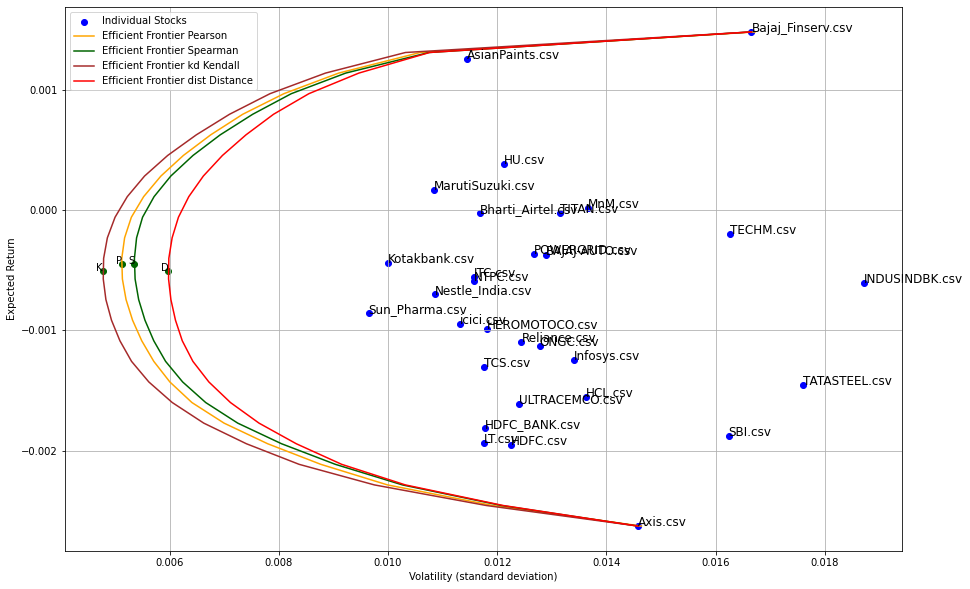

In [178]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10,10))

fig, ax = plt.subplots(figsize=(15,10))

# Plot volatility versus expected return for individual stocks
ax.scatter(x=std, y=mu,
           color='Blue', label='Individual Stocks')
for i, stock in enumerate(stocks):
    ax.annotate(stock, (std[i], mu[i]), size = 12)

# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility_p, y=minrisk_return_p, color='DarkGreen')
ax.annotate('P', (minrisk_volatility_p, minrisk_return_p),
           horizontalalignment='right')
# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility_sp, y=minrisk_return_sp, color='DarkGreen')
ax.annotate('S', (minrisk_volatility_sp, minrisk_return_sp),
            horizontalalignment='right')
# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility_ds, y=minrisk_return_ds, color='DarkGreen')
ax.annotate('D', (minrisk_volatility_ds, minrisk_return_ds),
            horizontalalignment='right')
# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility_kd, y=minrisk_return_kd, color='DarkGreen')
ax.annotate('K', (minrisk_volatility_kd, minrisk_return_kd),
            horizontalalignment='right')

# Plot efficient frontier
ax.plot(frontier_pearson[0], frontier_pearson[1], label='Efficient Frontier Pearson', color='Orange')
ax.plot(frontier_sp[0], frontier_sp[1], label='Efficient Frontier Spearman', color='DarkGreen')
ax.plot(frontier_kd[0], frontier_kd[1], label='Efficient Frontier kd Kendall', color='Brown')
ax.plot(frontier_dist[0], frontier_dist[1], label='Efficient Frontier dist Distance', color='Red')

# Format and display the final plot
#ax.axis([frontier[0].min()*0.7, frontier[0].max()*1.3, delta.min()*1.2, delta.max()*1.2])
ax.set_xlabel('Volatility (standard deviation)')
ax.set_ylabel('Expected Return')
ax.legend()
ax.grid()
plt.savefig('Efficient_Frontier.png')

In [182]:

m = gp.Model('portfolio')
m.params.NonConvex = 2
x = m.addMVar(len(stocks), vtype=GRB.INTEGER, lb = 0, name = "x")
print(x @ closes)
portfolio_risk = ((x @ closes) @ cov @ (x @ closes))/(budget**2)
portfolio_return = ((x @ closes) @ delta)/budget
print(x.shape, sigma.shape, x.shape, sep=" ", end="\n")
print(x.shape, delta.shape, sep=" ", end="\n")
m.setObjective(portfolio_return, GRB.MAXIMIZE)

# Fix budget with a constraint
m.addConstr((x @ closes).sum() <= budget, 'budget')
m.addConstr(portfolio_risk <= gamma**2, 'Risk')
#m.addConstr(x@delta >= 0.001, 'return')

# Verify model formulation
m.write(str(method)+'.lp')

# Optimize model to find the minimum risk portfolio
m.optimize()

maxreturn_volatility = sqrt(((x.X @ closes) @ cov @ (x.X @ closes))/(budget**2))
maxreturn_return = (m.ObjVal)

portfolio_return_kd = mu @ x
target = m.addConstr(portfolio_return_kd == maxreturn_return, 'target')

# Solve for efficient frontier by varying target return
frontier_kd = np.empty((2,0))
for r in np.linspace(mu.min(), mu.max(), 25):
    target.rhs = r
    m.optimize()
    frontier_kd = np.append(frontier_kd, [[sqrt(m.ObjVal)],[r]], axis=1)

Set parameter NonConvex to value 2
<MLinExpr (120,)  >
array([ 1009.55 <gurobi.Var *Awaiting Model Update*> + 2203.3 <gurobi.Var *Awaiting Model Update*> + 1240.65 <gurobi.Var *Awaiting Model Update*> + 839.9 <gurobi.Var *Awaiting Model Update*> + 1692.15 <gurobi.Var *Awaiting Model Update*> + 2493.35 <gurobi.Var *Awaiting Model Update*> + 1101.95 <gurobi.Var *Awaiting Model Update*> + 2166.15 <gurobi.Var *Awaiting Model Update*> + 8242.9 <gurobi.Var *Awaiting Model Update*> + 102.1 <gurobi.Var *Awaiting Model Update*> + 762.45 <gurobi.Var *Awaiting Model Update*> + 1560.65 <gurobi.Var *Awaiting Model Update*> + 18953.1 <gurobi.Var *Awaiting Model Update*> + 3120.5 <gurobi.Var *Awaiting Model Update*> + 378.7 <gurobi.Var *Awaiting Model Update*> + 2313.35 <gurobi.Var *Awaiting Model Update*> + 852.4 <gurobi.Var *Awaiting Model Update*> + 149.4 <gurobi.Var *Awaiting Model Update*> + 1051.75 <gurobi.Var *Awaiting Model Update*> + 222.4 <gurobi.Var *Awaiting Model Update*> + 3827.9 <gurob

ValueError: Mismatching inner dimensions 120 vs. 30